# Comparing different datasets, NK cells

- CLR normalized protein data is used in comparisons of surface markers between different datasets in this notebook
- focusing on NK cells 

Datasets:

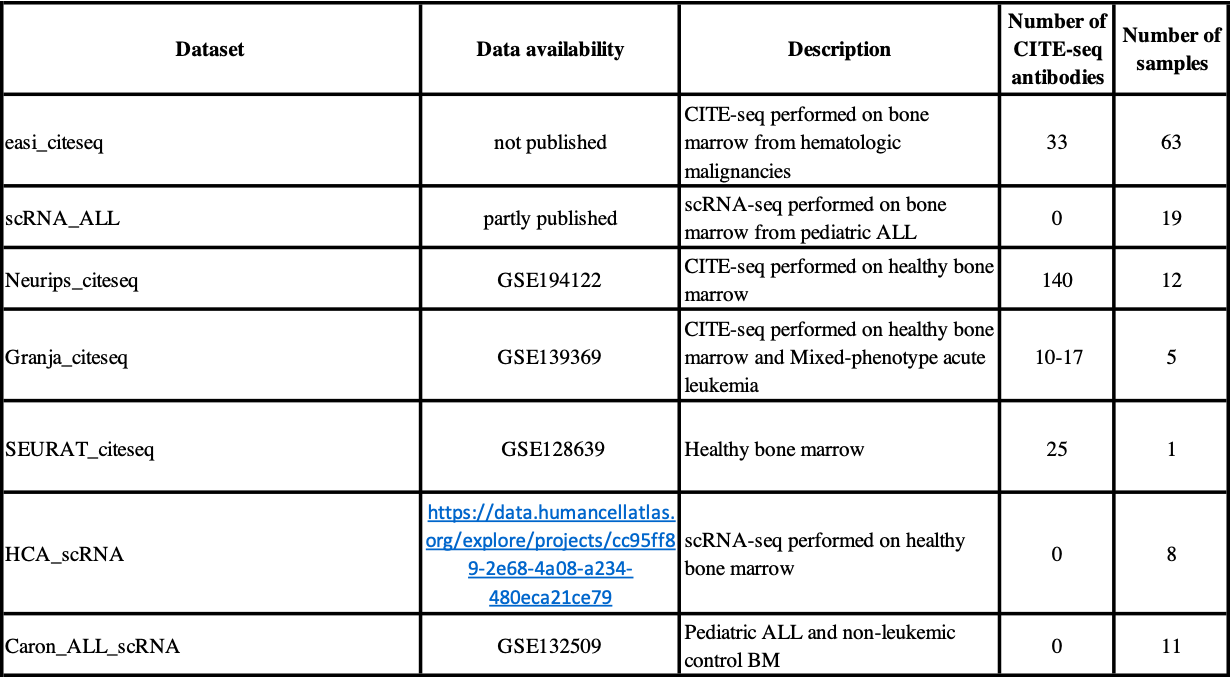

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap
from muon import prot as pt

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')



Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


## Neurips

In [2]:
#Neurips

adata_neurips = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_neurips_norm.h5ad')

In [3]:
neurips_prot=adata_neurips.obsm['protein_expression_clr_neurips']

In [4]:
neurips_prot

,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,CD52,...,CD101,CD88,CD224,CD197,CD34,CD10,CD90,CD15,CD117,CD66ace
GTAGTACCAATCCTTT-1-s4d1,0.652674,1.447594,1.489354,0.890243,1.290341,1.988618,1.733474,0.850004,1.531390,0.694828,...,0.900688,1.389844,0.918109,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CTCAAGAGTCACAGAG-1-s4d1,0.652674,1.069339,1.657770,0.890243,1.377072,1.264995,1.863027,1.101769,1.562259,1.072649,...,1.786480,0.762359,1.112478,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CTGTGGGTCATGCGGC-1-s4d1,0.378666,1.132949,1.153412,0.730824,1.195368,1.546005,1.090567,1.173337,1.303511,1.013739,...,0.860303,0.979461,1.147198,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CGTGATAGTTATCTGG-1-s4d1,0.000000,1.249182,1.335424,1.256332,2.674106,1.322314,0.289336,1.240123,1.397398,1.525053,...,0.629556,0.854928,1.000442,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGATCCAAGATCGGTG-1-s4d1,2.784459,1.132949,1.674846,1.669058,1.663981,2.101246,2.112640,1.417276,1.884321,1.861734,...,2.808629,2.007436,2.064066,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTGGTTAGTCGAGTTT-1-s1d3,0.000000,0.175083,0.734526,0.000000,0.505917,1.235054,1.241451,0.512721,0.502246,1.766372,...,0.519947,0.484666,0.497623,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCTACAACAGTGCGCT-1-s1d3,0.378666,0.453643,0.894450,0.000000,0.766577,1.058199,1.529611,0.512721,0.663922,1.766372,...,1.415230,0.854928,0.560915,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACAAAGGTTGGTACT-1-s1d3,0.378666,0.324031,1.094684,0.306698,0.401377,1.983838,2.156735,0.512721,0.835018,2.400949,...,1.315806,0.605141,0.357584,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TGACAGTCATGGCTGC-1-s1d3,0.378666,0.764571,0.776968,0.306698,0.152401,1.358780,1.753042,0.201533,0.586348,1.543085,...,1.113769,0.660339,0.960123,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
adata_neurips.obs['new_cell_type'].unique()

['NK', 'T', 'Prog', 'Myel', 'B', 'DC', 'E', 'Normoblast']
Categories (8, object): ['B', 'DC', 'E', 'Myel', 'NK', 'Normoblast', 'Prog', 'T']

In [6]:
#Select only T-cells

neurips_nk=adata_neurips[adata_neurips.obs['new_cell_type'] == 'NK' ]

In [7]:
neurips_nk

View of AnnData object with n_obs × n_vars = 7388 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr_neurips'
    obsp: 'connectivities', 'distances'

In [8]:
neurips_nk_prot=neurips_nk.obsm['protein_expression_clr_neurips']

In [9]:
neurips_nk_prot

,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,CD52,...,CD101,CD88,CD224,CD197,CD34,CD10,CD90,CD15,CD117,CD66ace
GTAGTACCAATCCTTT-1-s4d1,0.652674,1.447594,1.489354,0.890243,1.290341,1.988618,1.733474,0.850004,1.531390,0.694828,...,0.900688,1.389844,0.918109,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CTGTGGGTCATGCGGC-1-s4d1,0.378666,1.132949,1.153412,0.730824,1.195368,1.546005,1.090567,1.173337,1.303511,1.013739,...,0.860303,0.979461,1.147198,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCAACATTCGCAAGAG-1-s4d1,0.378666,1.192753,1.208881,0.000000,1.456877,1.046035,1.333993,0.638218,1.360894,1.072649,...,0.329073,1.280509,0.676616,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCACGGGTCGCACGAC-1-s4d1,0.000000,0.849902,1.548700,0.730824,1.530781,1.883102,1.686271,1.240123,1.804089,0.812797,...,0.576253,1.189870,1.000442,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CGCCAGAAGACCATTC-1-s4d1,0.652674,1.249182,1.404314,0.306698,1.417770,1.664855,1.409627,1.302726,1.663363,0.849218,...,0.680162,1.415407,0.729806,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCATTCGTCCAATCA-1-s1d3,0.000000,0.568367,1.124479,1.027708,0.600556,2.007513,1.679342,0.749707,0.545181,0.288523,...,0.519947,0.809714,0.357584,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACATTTCCAGCAGTGA-1-s1d3,0.000000,0.671273,0.856802,0.000000,0.284617,1.105431,0.818721,0.201533,0.309292,0.652195,...,0.519947,0.546717,0.194691,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TGAGACTTCCTTCAGC-1-s1d3,0.000000,0.671273,0.734526,0.306698,0.284617,1.255114,1.174628,0.749707,0.625887,0.406586,...,0.396827,0.418509,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GAGATGGTCCGCCTAT-1-s1d3,0.000000,0.928521,0.999570,0.541080,0.600556,1.759143,2.420602,1.024682,0.700563,0.406586,...,0.576253,0.546717,0.430053,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#To exclude columns that contain only zeros

neurips_nk_prot = pd.DataFrame(neurips_nk_prot)
neurips_nk_prot != 0
(neurips_nk_prot != 0).any(axis=0)
neurips_nk_prot.loc[:, (neurips_nk_prot != 0).any(axis=0)]
neurips_nk_prot = neurips_nk_prot.loc[:, (neurips_nk_prot != 0).any(axis=0)]

for col in neurips_nk_prot:
    print(col)

CD86
CD274
CD270
CD155
CD112
CD47
CD48
CD40
CD154
CD52
CD3
CD8
CD56
CD19
CD33
CD11c
HLA-A-B-C
CD45RA
CD123
CD7
CD105
CD49f
CD194
CD4
CD44
CD14
CD16
CD25
CD45RO
CD279
TIGIT
CD20
CD335
CD31
Podoplanin
CD146
IgM
CD5
CD195
CD32
CD196
CD185
CD103
CD69
CD62L
CD161
CD152
CD223
KLRG1
CD27
CD107a
CD95
CD134
HLA-DR
CD1c
CD11b
CD64
CD141
CD1d
CD314
CD35
CD57
CD272
CD278
CD58
CD39
CX3CR1
CD24
CD21
CD11a
CD79b
CD244
CD169
integrinB7
CD268
CD42b
CD54
CD62P
CD119
TCR
CD192
CD122
FceRIa
CD41
CD137
CD163
CD83
CD124
CD13
CD2
CD226
CD29
CD303
CD49b
CD81
IgD
CD18
CD28
CD38
CD127
CD45
CD22
CD71
CD26
CD115
CD63
CD304
CD36
CD172a
CD72
CD158
CD93
CD49a
CD49d
CD73
CD9
TCRVa7.2
TCRVd2
LOX-1
CD158b
CD158e1
CD142
CD319
CD352
CD94
CD162
CD85j
CD23
CD328
HLA-E
CD82
CD101
CD88
CD224


## Granja

In [11]:
adata_granja = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_granja_norm.h5ad')


In [12]:
adata_granja.obs['cell_type'].unique().to_list()

['CD4+ T 1',
 'CD14+ monocyte 1',
 'Pre B',
 'Pro B',
 'CD8+ T',
 'Promonocyte',
 'CD14+ monocyte 2',
 'Plasmacytoid dendritic cell',
 'NK T 2',
 'Immature B',
 'Late erythoid precursor 1',
 'Pre B (cycling)',
 'NK',
 'Late erythoid precursor 3',
 'Early erythoid precursor',
 'CD16+ monocyte',
 'Conventional dendritic cell',
 'HSC',
 'NK T 1',
 'Late erythoid precursor 2',
 'Plasma B cell',
 'Stromal cell',
 'Megakaryocyte',
 nan]

In [13]:
#Select T-cells
granja_nk=adata_granja[adata_granja.obs['new_cell_type'] == 'NK' ]

In [14]:
granja_nk

View of AnnData object with n_obs × n_vars = 1033 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr_granja'
    obsp: 'connectivities', 'distances'

In [15]:
granja_nk_prot=granja_nk.obsm['protein_expression_clr_granja']

granja_nk_prot

,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,CD52,...,CD101,CD88,CD224,CD197,CD34,CD10,CD90,CD15,CD117,CD66ace
BMMC_D1T1:AAAGAACTCGAAGAAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.346739,0.0,0.0
BMMC_D1T1:AAAGGGCAGAAGTGTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.927923,0.0,0.0
BMMC_D1T1:AAAGTCCGTCGGAAAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.890060,0.0,0.0
BMMC_D1T1:AAAGTGAGTTACCCAA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.346739,0.0,0.0
BMMC_D1T1:AACAAAGAGTCTGCGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.016744,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BMMC_D1T2:TTTACTGGTCAGGAGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.830436,0.0,0.0
BMMC_D1T2:TTTCACACAACGCATT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.144246,0.0,0.0
BMMC_D1T2:TTTCAGTTCCAACACA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.744967,0.0,0.0
BMMC_D1T2:TTTCAGTTCTCGGCTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.809744,0.0,0.0


In [16]:
#To exclude columns that contain only zeros

granja_nk_prot = pd.DataFrame(granja_nk_prot)
granja_nk_prot != 0
(granja_nk_prot != 0).any(axis=0)
granja_nk_prot.loc[:, (granja_nk_prot != 0).any(axis=0)]
granja_nk_prot = granja_nk_prot.loc[:, (granja_nk_prot != 0).any(axis=0)]

for col in granja_nk_prot:
    print(col)

CD3
CD8
CD56
CD19
CD45RA
CD4
CD14
CD16
CD25
CD45RO
CD279
TIGIT
CD127
CD15


## Easigenomics

### Comments:

- Only NKT annotation available (NK- + T-cells)

In [17]:
adata_easi = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_easi_norm.h5ad')

In [18]:
adata_easi.obs['cell_type'].unique().to_list()

['NKT',
 'non-leukemic',
 'preleukemic',
 'non-leukemic?',
 nan,
 'leukemic',
 'leukemic?',
 'doublets?',
 'unknown',
 '0',
 'preleukemic?']

In [19]:
#Select NK + T

easi_nkt=adata_easi[adata_easi.obs['cell_type'] == 'NKT' ]

In [20]:
easi_nkt

View of AnnData object with n_obs × n_vars = 27738 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [21]:
easi_nkt_prot=easi_nkt.obsm['protein_expression_clr']

easi_nkt_prot

,CD19,CD10,CD20,CD3,CD2,CD11b,HLADR,CD38,CD11c,CD7,...,CD5,CD15,CD64,CD117,CD24,CD44,CD58,CD66ace,CD13,CD34
AAACCTGAGCCCTAAT-1-100,0.478646,0.589328,0.507486,0.418344,1.800515,0.735300,0.821979,0.386772,0.779578,1.667181,...,0.507486,1.108744,0.640390,0.418344,0.285596,2.054122,0.589328,0.779578,0.285596,0.779578
AAACCTGCAGACGCTC-1-100,0.332147,0.357515,0.694546,0.540162,1.879650,0.600883,0.888949,0.453003,0.694546,2.364060,...,1.135601,1.039049,0.164727,0.406398,0.382255,2.121294,0.429972,0.560815,0.194650,0.796464
AAACCTGTCCTTAATC-1-100,0.363054,0.530829,0.530829,0.363054,1.853775,0.651907,0.800025,0.332136,0.857352,1.225956,...,1.088464,0.838606,0.422162,0.363054,0.267275,2.193482,0.696512,0.556246,0.123380,0.780162
AAACGGGGTCTCTCGT-1-100,0.345256,0.537805,0.469869,0.699197,2.790828,0.580660,0.735780,0.290712,0.559462,1.266690,...,1.055818,0.960086,0.345256,0.233019,0.371452,3.018252,0.345256,0.661225,0.139715,0.580660
AAAGATGTCCAGTAGT-1-100,0.318489,0.283800,0.171871,0.611861,2.949483,0.878145,0.817923,0.352015,0.636968,0.731533,...,0.775660,1.164216,0.318489,0.504607,0.247864,3.084753,0.611861,0.532518,0.247864,0.708717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTAGGCACAGAAGCAC-1-158,0.340343,2.252768,0.449547,1.323601,1.740991,0.719847,0.831768,0.150291,0.963831,1.501118,...,0.449547,0.547991,0.150291,0.280917,0.449547,2.589648,0.340343,0.280917,0.077966,0.795835
TTCTACAGTGAGCGAT-1-158,0.573392,1.834990,0.805958,1.371751,2.396818,0.696421,0.734282,0.074576,0.381558,1.659849,...,1.022751,0.433076,0.327242,0.074576,0.143975,3.181108,0.657069,0.433076,0.000000,0.616106
TTGAACGAGCGGATCA-1-158,0.805655,1.364387,1.010871,0.984009,3.220271,0.547156,0.588433,0.310543,0.504102,0.628074,...,1.306933,0.362557,0.547156,0.070303,0.070303,3.536822,0.135986,0.504102,0.135986,0.547156
TTGCCGTAGATCCGAG-1-158,0.684616,2.130814,0.552307,1.000730,3.025827,0.366277,0.844607,0.219740,0.399785,2.272088,...,0.659517,0.432208,0.552307,0.179486,0.179486,3.592897,0.295690,0.331606,0.179486,0.756338


In [22]:
easi_nkt_prot["CD56"]

AAACCTGAGCCCTAAT-1-100    0.664975
AAACCTGCAGACGCTC-1-100    0.560815
AAACCTGTCCTTAATC-1-100    0.800025
AAACGGGGTCTCTCGT-1-100    0.421871
AAAGATGTCCAGTAGT-1-100    0.731533
                            ...   
TTAGGCACAGAAGCAC-1-158    0.340343
TTCTACAGTGAGCGAT-1-158    0.327242
TTGAACGAGCGGATCA-1-158    0.628074
TTGCCGTAGATCCGAG-1-158    1.000730
TTTGCGCTCTGTCTCG-1-158    0.624132
Name: CD56, Length: 27738, dtype: float64

## Seurat 

In [23]:
adata_seurat = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_seurat_norm.h5ad')


In [24]:
adata_seurat.obs['cell_type'].unique().to_list()

['Prog_RBC',
 'gdT',
 'CD4 Naive',
 'CD4 Memory',
 'CD14 Mono',
 'Naive B',
 'CD8 Naive',
 'Treg',
 'CD8 Effector_2',
 'NK',
 'GMP',
 'CD8 Effector_1',
 'CD16 Mono',
 'pDC',
 'CD8 Memory_1',
 'MAIT',
 'Memory B',
 'cDC2',
 'CD56 bright NK',
 'Prog_B 2',
 'Prog_Mk',
 'CD8 Memory_2',
 'Plasmablast',
 'HSC',
 'LMPP',
 'Prog_DC',
 'Prog_B 1']

In [25]:
#Select T-cells

seurat_nk=adata_seurat[adata_seurat.obs['new_cell_type'] == 'NK' ]

In [26]:
seurat_nk

View of AnnData object with n_obs × n_vars = 1355 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr_seurat'
    obsp: 'connectivities', 'distances'

In [27]:
seurat_nk_prot=seurat_nk.obsm['protein_expression_clr_seurat']

seurat_nk_prot

,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,CD52,...,CD101,CD88,CD224,CD197,CD34,CD10,CD90,CD15,CD117,CD66ace
a_AAACCTGTCTAACGGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.575796,0.555985,0.0,0.0,0.0,0.0,0.0
a_AAACGGGGTTCGGCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.249285,0.000000,0.0,0.0,0.0,0.0,0.0
a_AAAGCAAAGACCTAGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.402419,0.475269,0.0,0.0,0.0,0.0,0.0
a_AAAGCAAAGCGTCAAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.938870,0.700162,0.0,0.0,0.0,0.0,0.0
a_AAAGCAACAATGTTGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.614819,0.555985,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b_TTTATGCTCAACACAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.614819,0.387462,0.0,0.0,0.0,0.0,0.0
b_TTTCCTCAGATCCCGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.192545,0.883647,0.0,0.0,0.0,0.0,0.0
b_TTTCCTCAGTACATGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.575796,0.291195,0.0,0.0,0.0,0.0,0.0
b_TTTGCGCGTGGTCTCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.302978,0.387462,0.0,0.0,0.0,0.0,0.0


In [28]:
#To exclude columns that contain only zeros

seurat_nk_prot = pd.DataFrame(seurat_nk_prot)
seurat_nk_prot != 0
(seurat_nk_prot != 0).any(axis=0)
seurat_nk_prot.loc[:, (seurat_nk_prot != 0).any(axis=0)]
seurat_nk_prot = seurat_nk_prot.loc[:, (seurat_nk_prot != 0).any(axis=0)]

for col in seurat_nk_prot:
    print(col)

CD3
CD8
CD56
CD19
CD11c
CD45RA
CD123
CD4
CD14
CD16
CD25
CD45RO
CD69
CD161
CD27
HLA-DR
CD57
CD278
CD11a
CD79b
CD28
CD38
CD127
CD197
CD34


# Comparisons

Comparisons of datasets that contain CITE-seq data:  
- Neurips, Granja, Easigenomics and Seurat
- Focusing on T cells

In [29]:
#sorting by mean, Neurips

index_sort = neurips_nk_prot.mean().sort_values().index
df_sorted_neurips = neurips_nk_prot[index_sort]

In [30]:
#sorting by mean, Granja

index_sort = granja_nk_prot.mean().sort_values().index
df_sorted_granja = granja_nk_prot[index_sort]

In [31]:
#sorting by mean, Easigenomics

index_sort = easi_nkt_prot.mean().sort_values().index
df_sorted_easi = easi_nkt_prot[index_sort]

In [32]:
#sorting by mean, Seurat

index_sort = seurat_nk_prot.mean().sort_values().index
df_sorted_seurat = seurat_nk_prot[index_sort]

In total 7388 NK cells in Neurips dataset
In total 1033 NK cells in Granja dataset
In total 27738 NK and T cells in Easigenomics dataset
In total 1355 NK cells in Neurips dataset


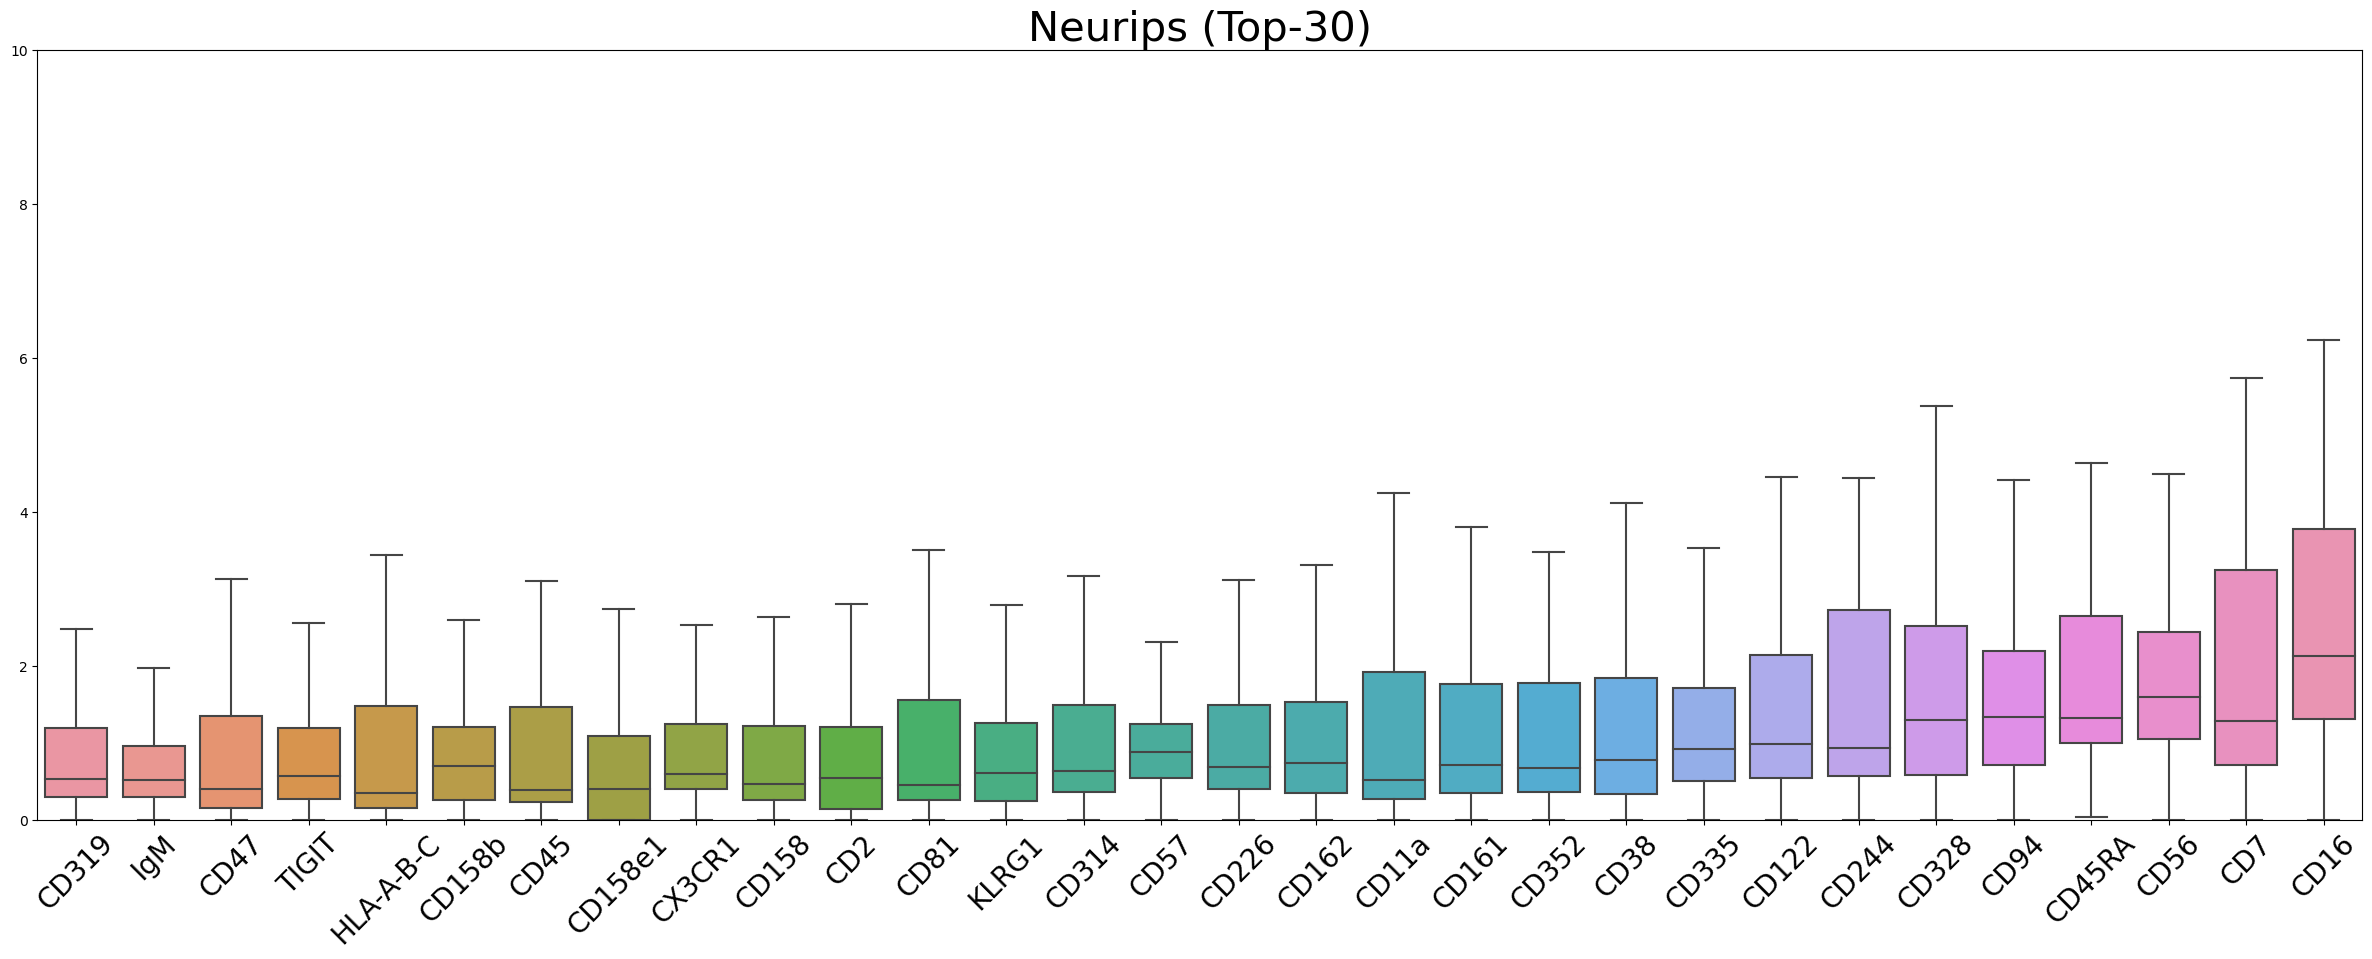

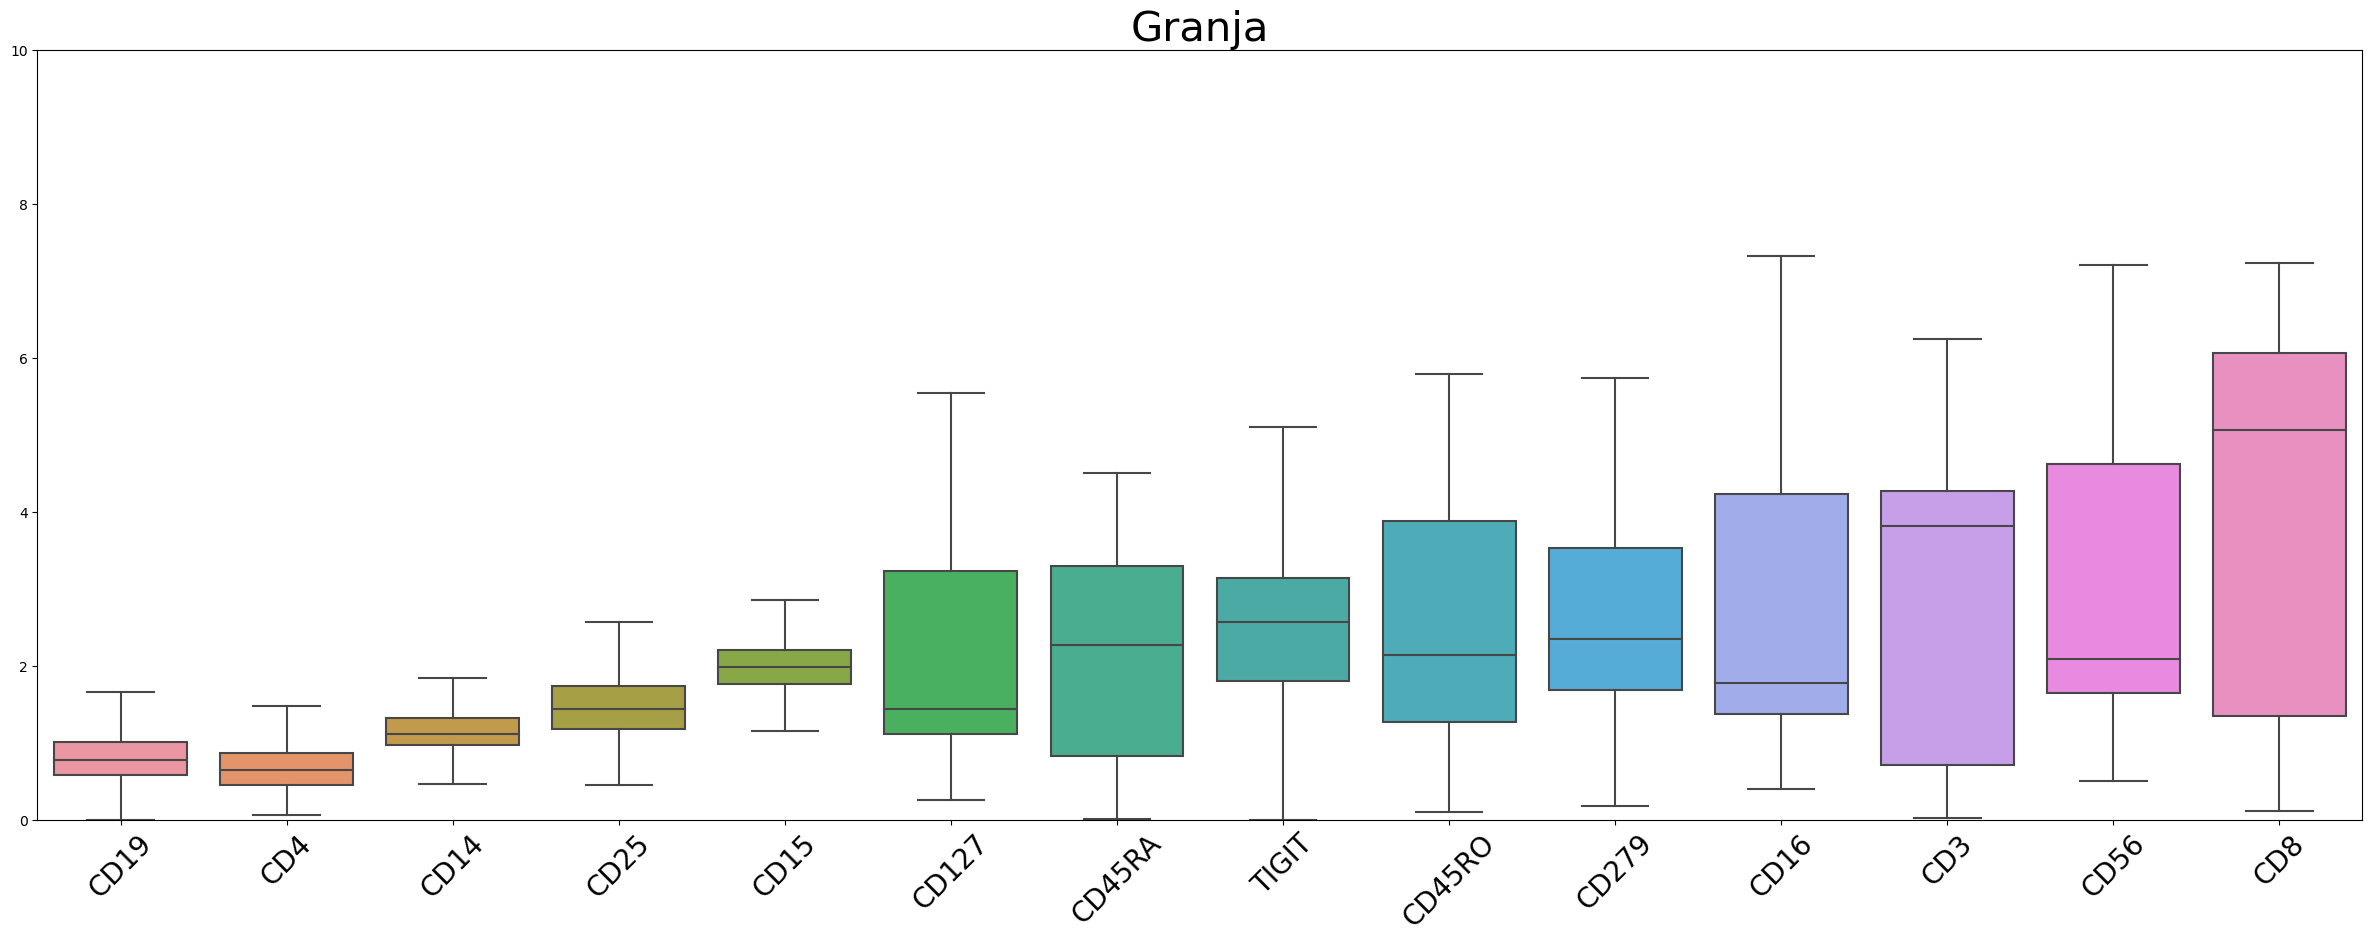

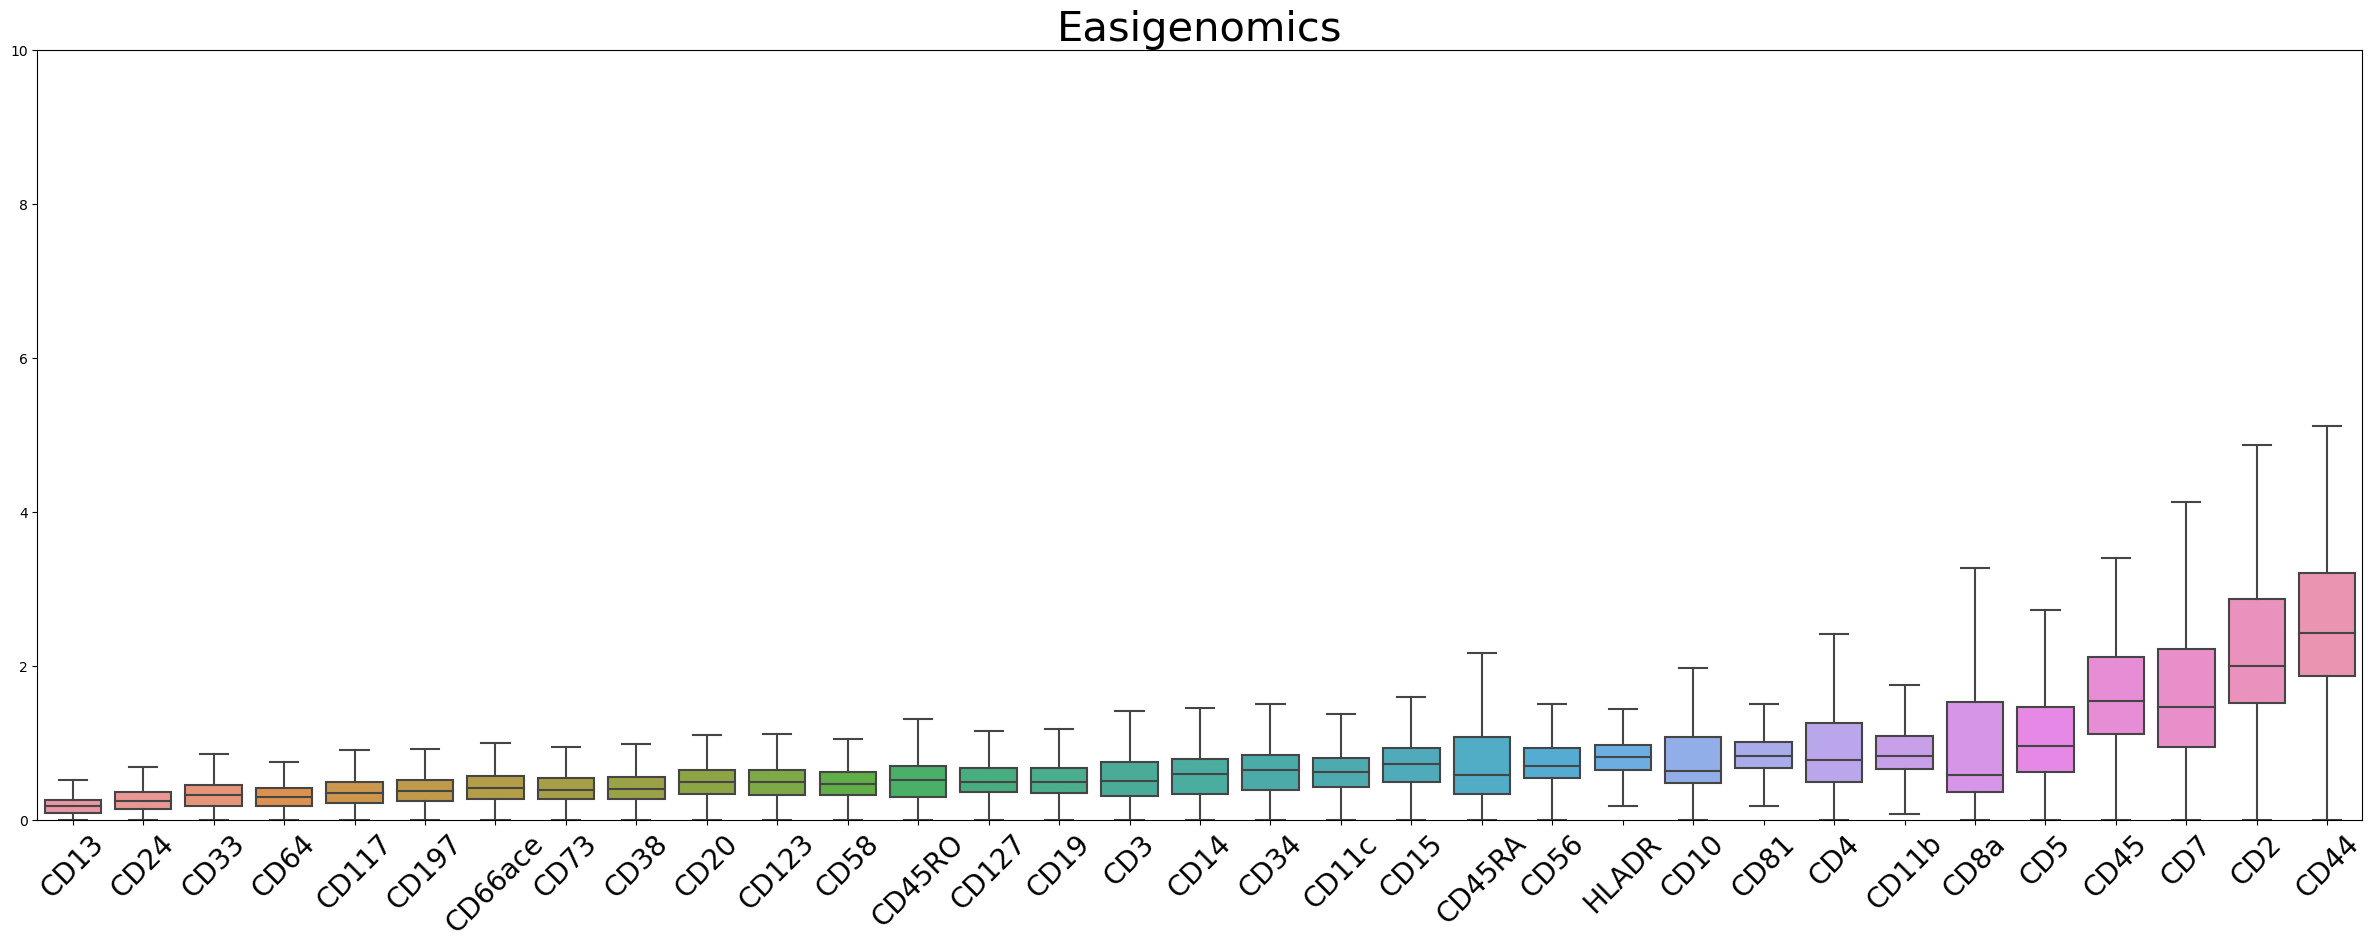

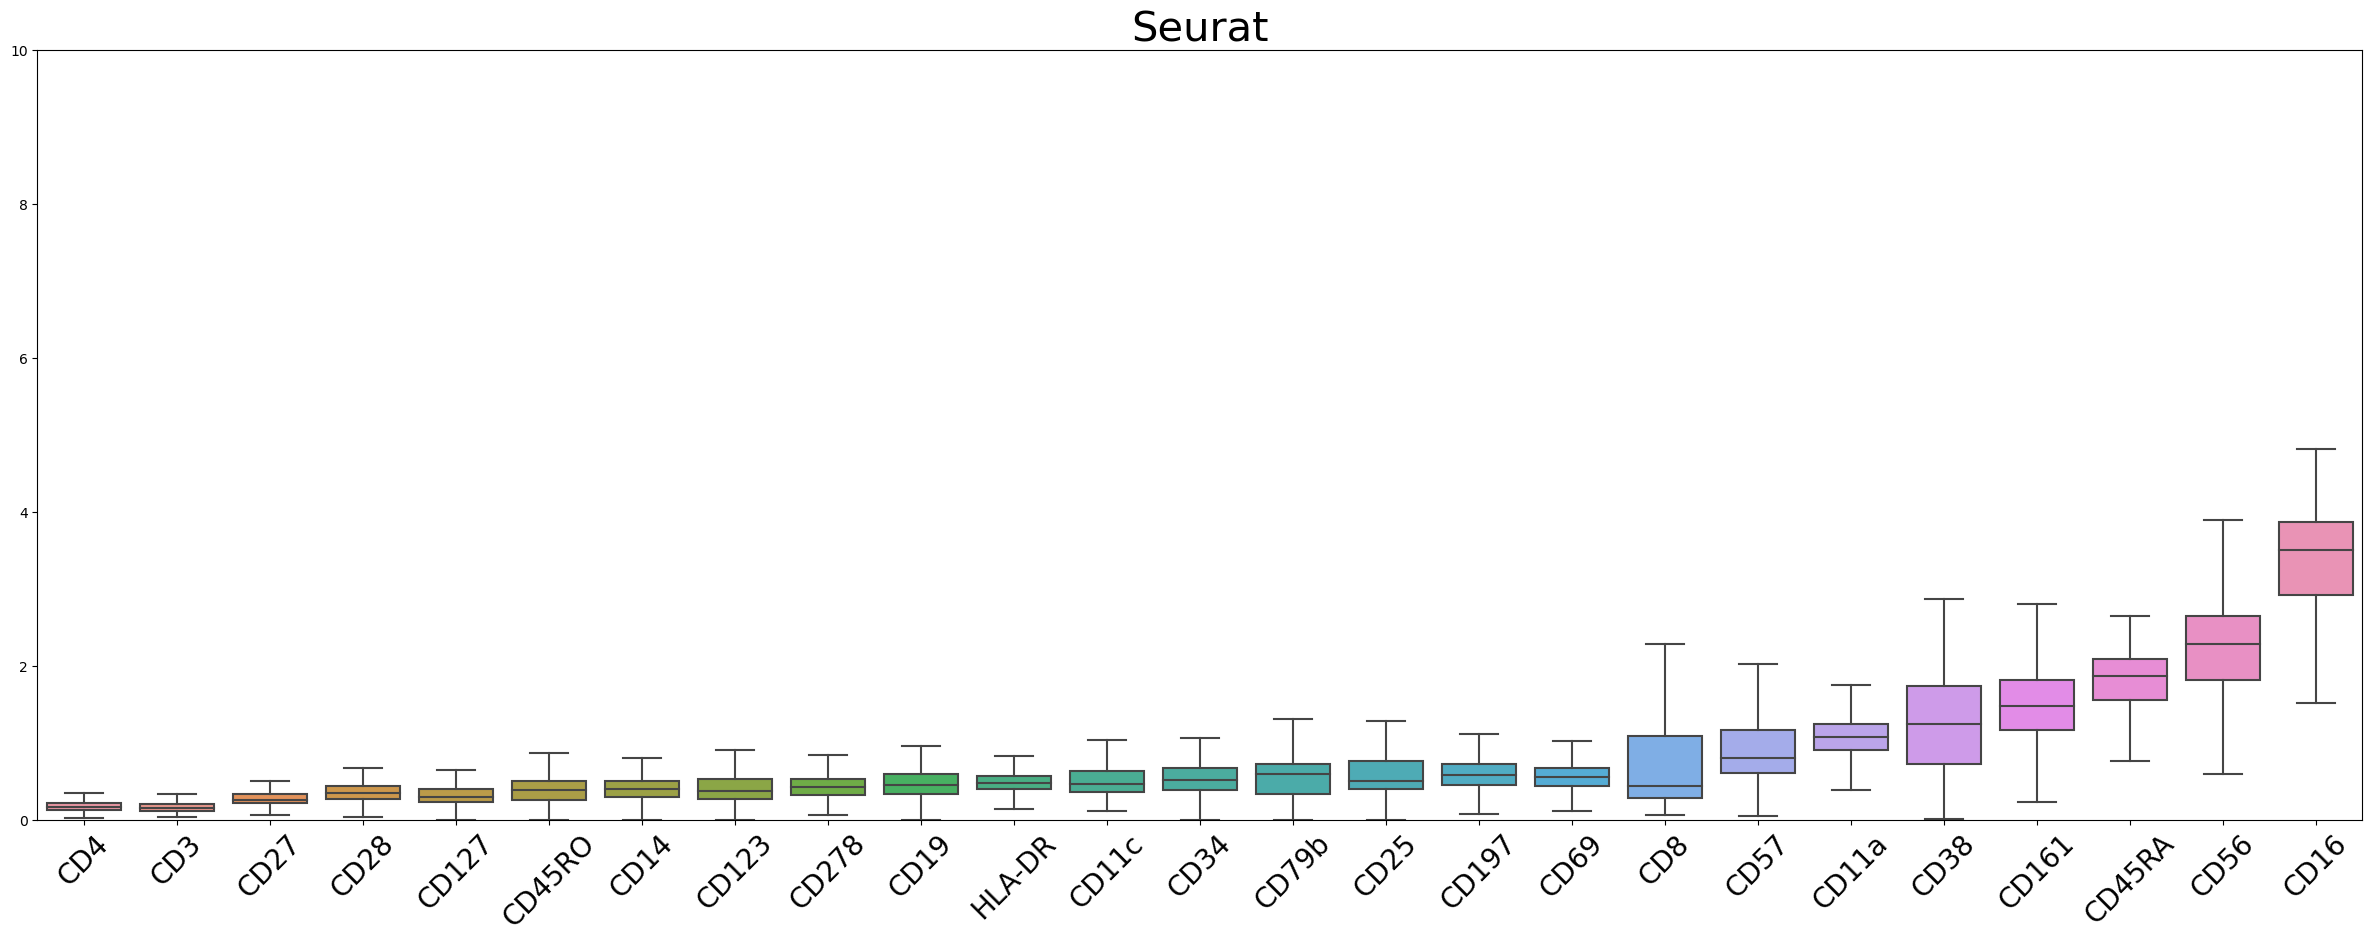

In [33]:
#Neurips top 30
print("In total", len(neurips_nk), "NK cells in Neurips dataset") 
plt.figure(figsize=(30,10))
plt.ylim(0, 10)
a=sns.boxplot(data=df_sorted_neurips.iloc[0:26775,104:134],  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("Neurips (Top-30)", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)

#Granja
print("In total", len(granja_nk), "NK cells in Granja dataset") 
plt.figure(figsize=(30,10))
plt.ylim(0, 10)
b=sns.boxplot(data=df_sorted_granja,  fliersize=0)

b.set_xticklabels(b.get_xticklabels(),rotation=45)
b.tick_params(axis='x', labelsize=20) 
plt.title("Granja", fontsize=30)

#Easigenomics
print("In total", len(easi_nkt), "NK and T cells in Easigenomics dataset") 
plt.figure(figsize=(30,10))
plt.ylim(0, 10)
c=sns.boxplot(data=df_sorted_easi,  fliersize=0)

c.set_xticklabels(c.get_xticklabels(),rotation=45) 
c.tick_params(axis='x', labelsize=20)
plt.title("Easigenomics", fontsize=30)

#Seurat
print("In total", len(seurat_nk), "NK cells in Neurips dataset") 
plt.figure(figsize=(30,10))
plt.ylim(0, 10)
d=sns.boxplot(data=df_sorted_seurat,  fliersize=0)

d.set_xticklabels(d.get_xticklabels(),rotation=45) 
d.tick_params(axis='x', labelsize=20)
plt.title("Seurat", fontsize=30) ;

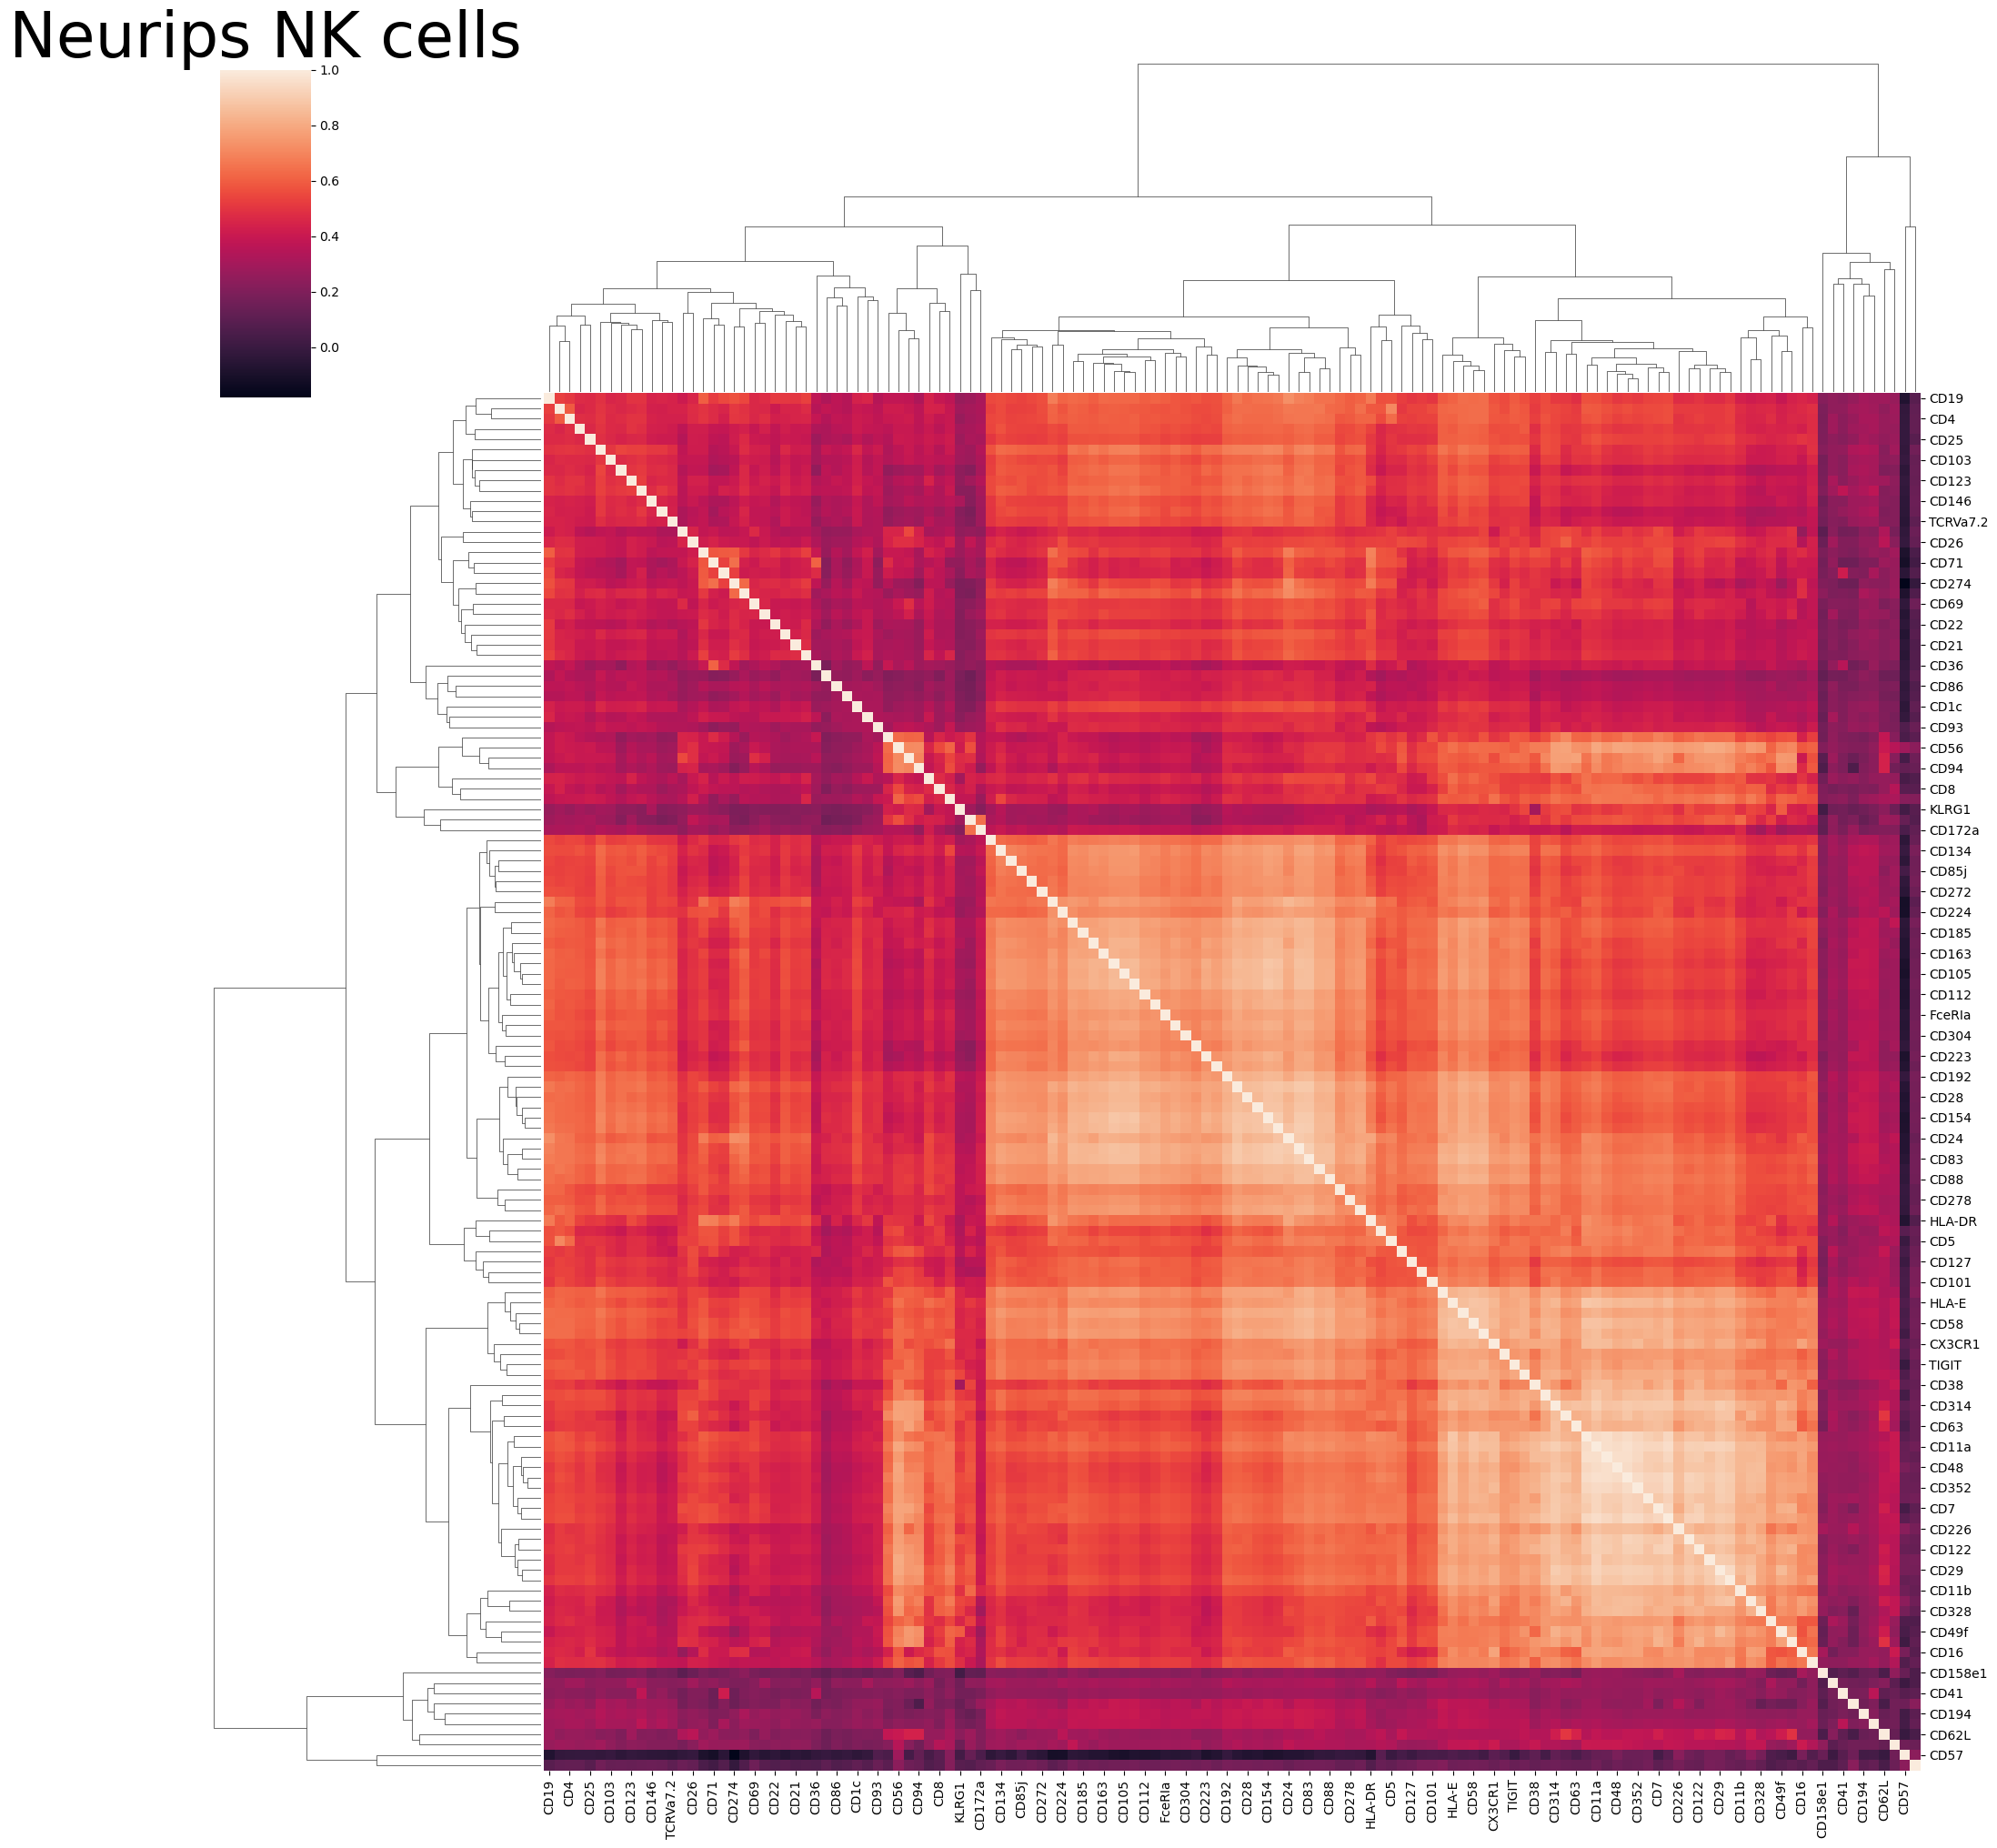

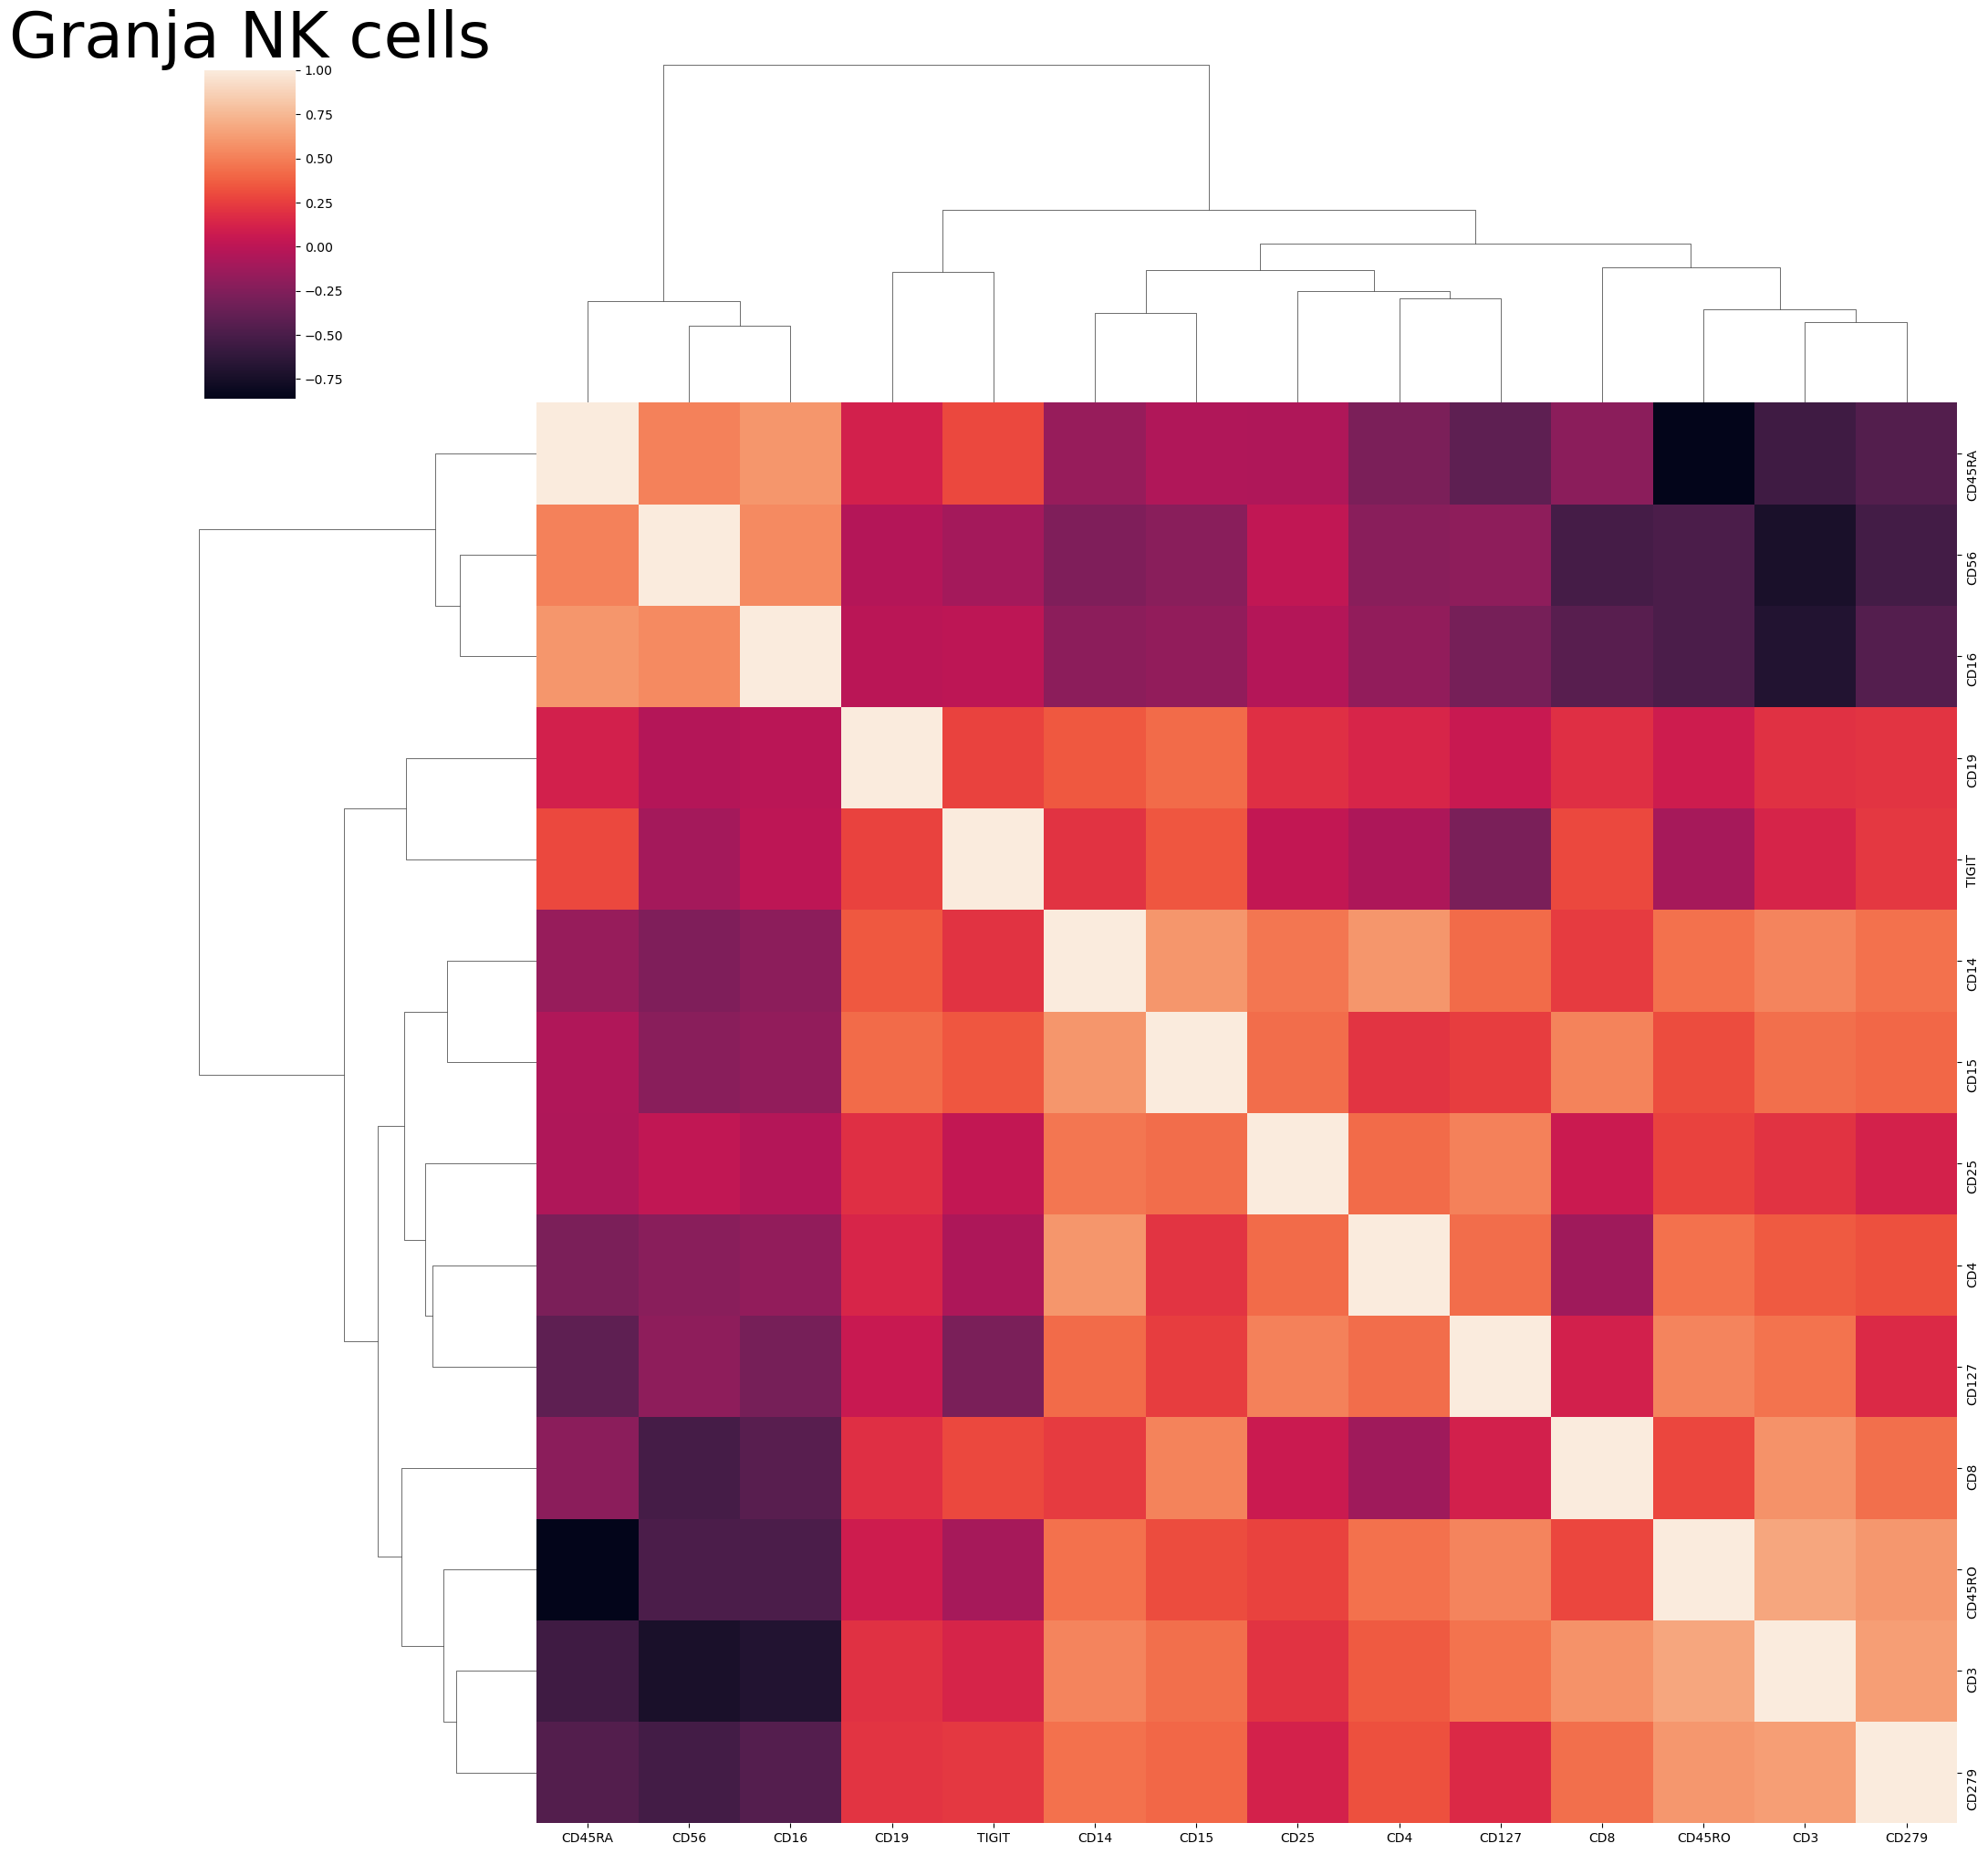

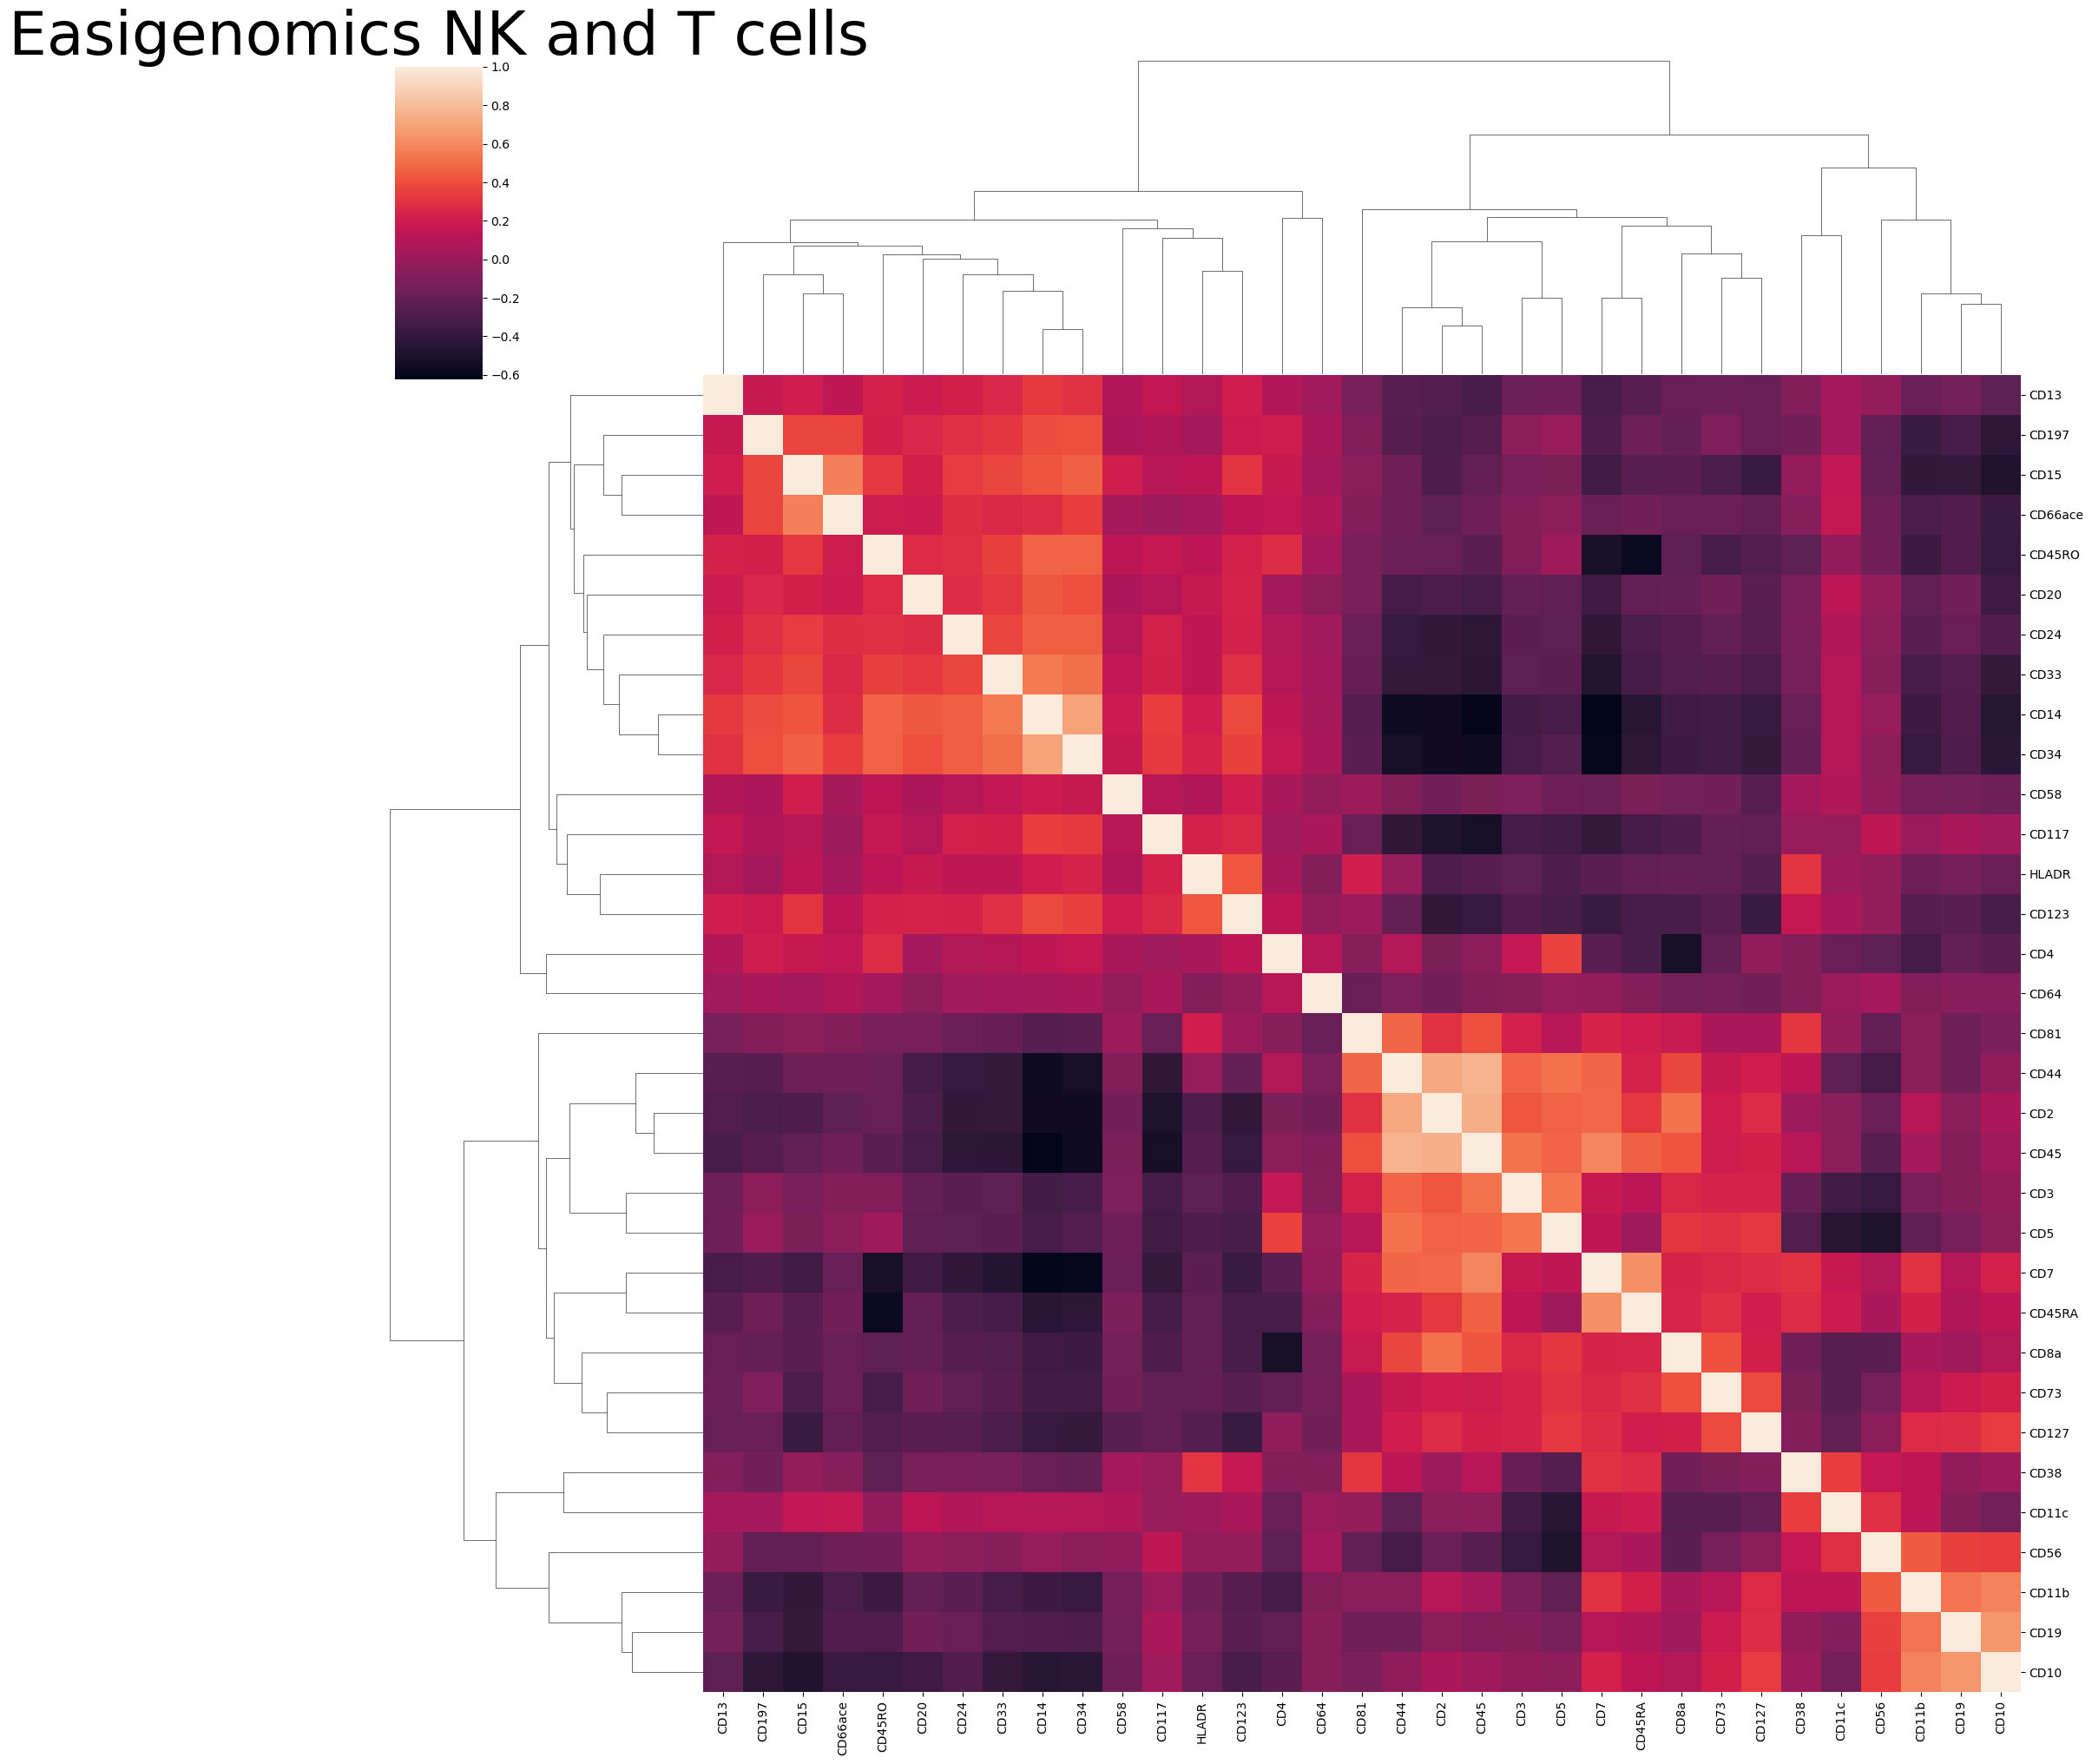

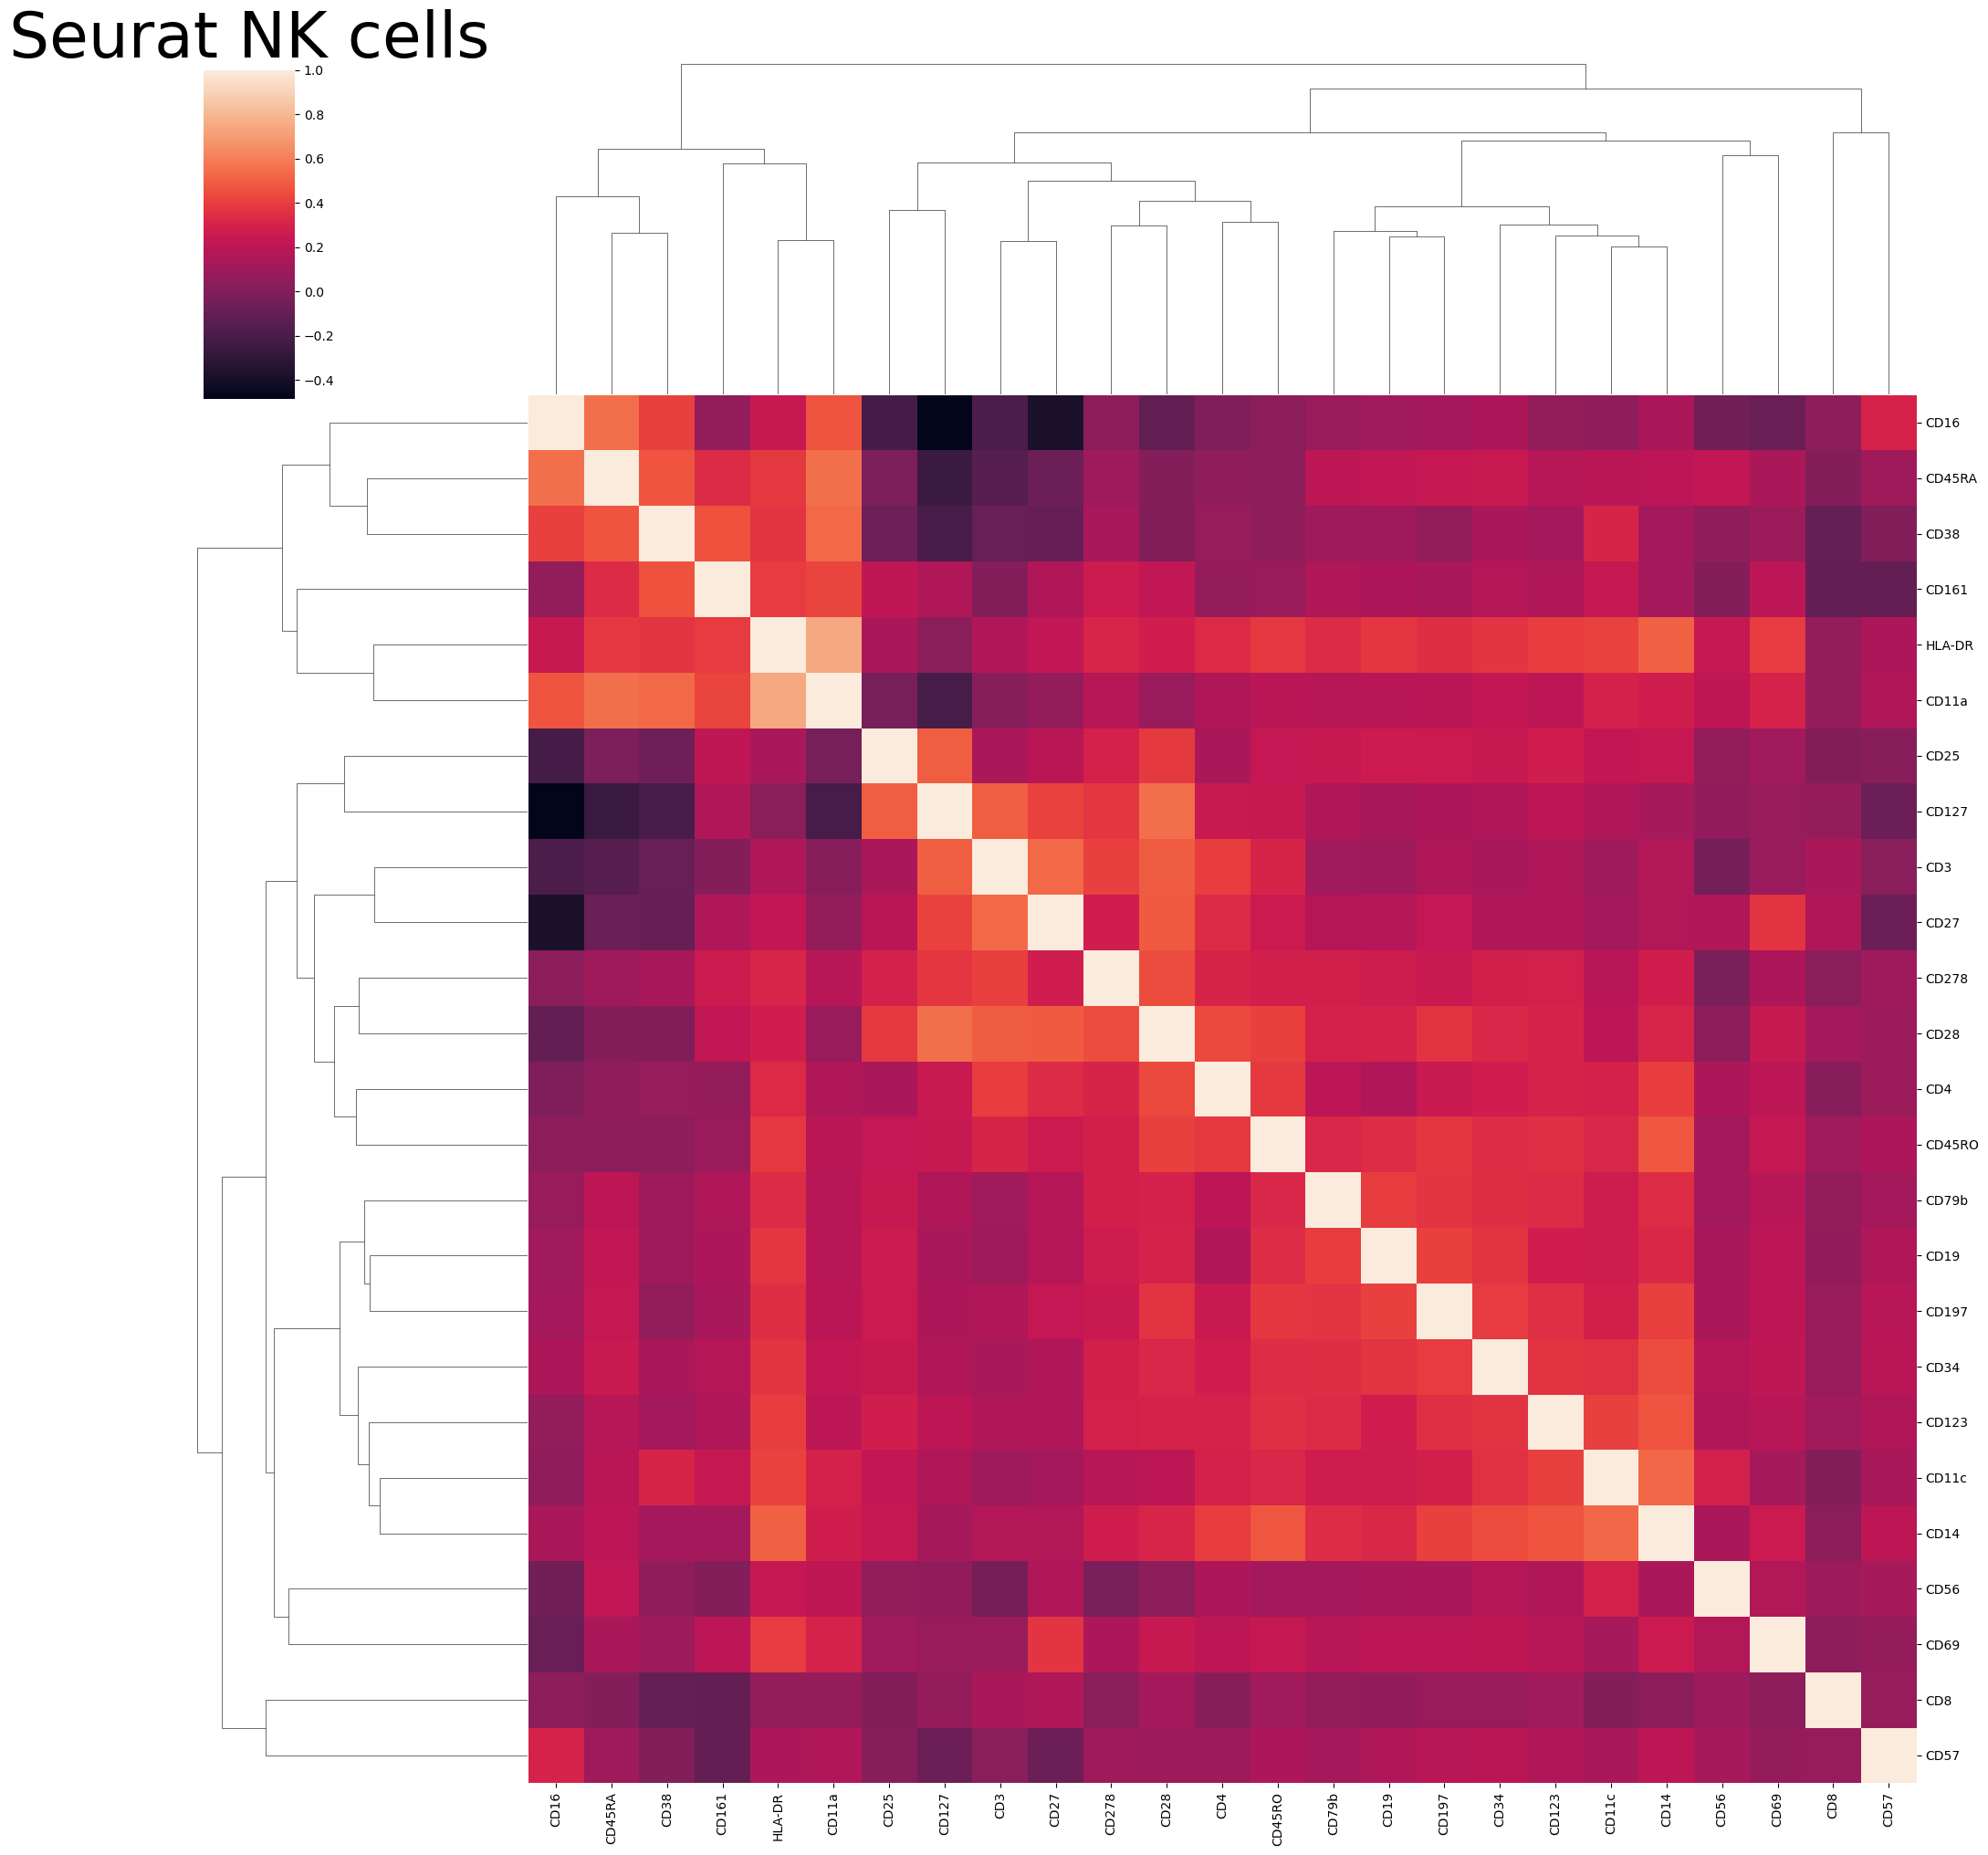

In [34]:
#Neurips
matrix3=neurips_nk_prot.corr(method='pearson', min_periods=1)
sns.clustermap(matrix3, figsize=(20,20))
plt.title('Neurips NK cells', fontsize = 50) ;


#Granja
matrix4=granja_nk_prot.corr(method='pearson', min_periods=1)
sns.clustermap(matrix4, figsize=(20,20))
plt.title('Granja NK cells', fontsize = 50) ;

#Easigenomics
matrix5=easi_nkt_prot.corr(method='pearson', min_periods=1) #NK +T
sns.clustermap(matrix5, figsize=(20,20))
plt.title('Easigenomics NK and T cells', fontsize = 50) ;

#Seurat
matrix6=seurat_nk_prot.corr(method='pearson', min_periods=1)
sns.clustermap(matrix6, figsize=(20,20))
plt.title('Seurat NK cells', fontsize = 50) ;


### UMAPS 

In [35]:
#Adding protein information to obs for UMAP, Granja
a = granja_nk.obs
b = granja_nk_prot

granja_umap=pd.concat([a, b], axis=1)


granja_nk.obs=granja_umap

granja_nk.obs

,cell_type,n_genes,percent_mito,percent_ribo,n_counts,leiden_r2,leiden_r2_n_genes_MAD_diff,leiden_r2_n_counts_MAD_diff,leiden_r2_percent_mito_MAD_diff,filter,...,CD45RA,CD4,CD14,CD16,CD25,CD45RO,CD279,TIGIT,CD127,CD15
BMMC_D1T1:AAAGAACTCGAAGAAT-1,NK T 2,1056,0.0,0.0,1910.0,1,0.127168,0.090680,NaN,False,...,1.363220,1.034146,1.405688,1.817872,2.046235,3.957790,3.787293,2.899355,3.336928,2.346739
BMMC_D1T1:AAAGGGCAGAAGTGTT-1,NK T 2,1206,0.0,0.0,2204.0,19,0.384615,0.644279,NaN,False,...,0.655778,0.730584,1.028080,1.308926,1.118105,4.615375,3.504164,3.537224,2.770059,1.927923
BMMC_D1T1:AAAGTCCGTCGGAAAC-1,NK,1337,0.0,0.0,2544.0,22,0.306569,0.683219,NaN,False,...,3.886487,0.430578,1.170387,6.548810,1.516564,1.032135,1.782866,2.117450,1.369466,1.890060
BMMC_D1T1:AAAGTGAGTTACCCAA-1,NK T 2,936,0.0,0.0,1639.0,4,0.961538,0.994490,NaN,False,...,1.765806,0.568000,0.897579,1.690424,1.917331,1.969241,1.640040,0.820348,4.543125,2.346739
BMMC_D1T1:AACAAAGAGTCTGCGC-1,NK T 2,974,0.0,0.0,1684.0,1,1.075145,1.047859,NaN,False,...,1.016710,0.858461,0.862108,1.930898,1.233558,3.033571,4.274431,3.419610,1.163131,2.016744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BMMC_D1T2:TTTACTGGTCAGGAGT-1,NK T 2,1023,0.0,0.0,1723.0,13,0.147239,0.589971,NaN,False,...,2.428487,0.659939,1.362850,1.308926,1.233558,1.998480,3.240109,2.826789,0.841551,1.830436
BMMC_D1T2:TTTCACACAACGCATT-1,NK T 2,1193,0.0,0.0,2137.0,12,0.270588,0.090909,NaN,False,...,1.732191,0.770693,1.115869,1.734736,1.286643,2.347602,2.823163,2.495170,1.331465,2.144246
BMMC_D1T2:TTTCAGTTCCAACACA-1,NK,1373,0.0,0.0,2383.0,23,0.899371,0.529248,NaN,False,...,3.452654,0.411992,0.617934,5.962028,1.595525,1.139736,1.749026,2.663649,1.926654,1.744967
BMMC_D1T2:TTTCAGTTCTCGGCTT-1,NK,1762,0.0,0.0,3349.0,23,3.345912,3.220056,NaN,False,...,3.135991,0.292581,1.028080,5.292056,1.860727,1.032135,1.327142,1.067100,0.960609,1.809744


In [36]:
#Adding protein information to obs for UMAP, Easigenomics 

a = easi_nkt.obs
b = easi_nkt_prot

easi_umap_nkt=pd.concat([a, b], axis=1)

easi_nkt.obs=easi_umap_nkt

easi_nkt.obs

,cell_type,n_genes,percent_mito,percent_ribo,n_counts,leiden_r2,leiden_r2_n_genes_MAD_diff,leiden_r2_n_counts_MAD_diff,leiden_r2_percent_mito_MAD_diff,filter,...,CD5,CD15,CD64,CD117,CD24,CD44,CD58,CD66ace,CD13,CD34
AAACCTGAGCCCTAAT-1-100,NKT,1104,0.072933,0.140216,1947.0,NaN,NaN,NaN,NaN,False,...,0.507486,1.108744,0.640390,0.418344,0.285596,2.054122,0.589328,0.779578,0.285596,0.779578
AAACCTGCAGACGCTC-1-100,NKT,1928,0.035144,0.433632,7142.0,NaN,NaN,NaN,NaN,False,...,1.135601,1.039049,0.164727,0.406398,0.382255,2.121294,0.429972,0.560815,0.194650,0.796464
AAACCTGTCCTTAATC-1-100,NKT,1750,0.029976,0.421151,5371.0,NaN,NaN,NaN,NaN,False,...,1.088464,0.838606,0.422162,0.363054,0.267275,2.193482,0.696512,0.556246,0.123380,0.780162
AAACGGGGTCTCTCGT-1-100,NKT,1729,0.069098,0.063340,3126.0,NaN,NaN,NaN,NaN,False,...,1.055818,0.960086,0.345256,0.233019,0.371452,3.018252,0.345256,0.661225,0.139715,0.580660
AAAGATGTCCAGTAGT-1-100,NKT,2025,0.047019,0.288148,5636.0,NaN,NaN,NaN,NaN,False,...,0.775660,1.164216,0.318489,0.504607,0.247864,3.084753,0.611861,0.532518,0.247864,0.708717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTAGGCACAGAAGCAC-1-158,NKT,1728,0.022962,0.210951,3963.0,NaN,NaN,NaN,NaN,False,...,0.449547,0.547991,0.150291,0.280917,0.449547,2.589648,0.340343,0.280917,0.077966,0.795835
TTCTACAGTGAGCGAT-1-158,NKT,1734,0.034010,0.263274,4087.0,NaN,NaN,NaN,NaN,False,...,1.022751,0.433076,0.327242,0.074576,0.143975,3.181108,0.657069,0.433076,0.000000,0.616106
TTGAACGAGCGGATCA-1-158,NKT,1589,0.016802,0.177578,3452.0,NaN,NaN,NaN,NaN,False,...,1.306933,0.362557,0.547156,0.070303,0.070303,3.536822,0.135986,0.504102,0.135986,0.547156
TTGCCGTAGATCCGAG-1-158,NKT,2140,0.034307,0.258895,6296.0,NaN,NaN,NaN,NaN,False,...,0.659517,0.432208,0.552307,0.179486,0.179486,3.592897,0.295690,0.331606,0.179486,0.756338


In [37]:
#Adding protein information to obs for UMAP, Easigenomics 

a = neurips_nk.obs
b = neurips_nk_prot

neurips_umap=pd.concat([a, b], axis=1)

neurips_nk.obs=neurips_umap

In [38]:
#Adding protein information to obs for UMAP, Easigenomics 

a = seurat_nk.obs
b = seurat_nk_prot

seurat_umap=pd.concat([a, b], axis=1)

seurat_nk.obs=seurat_umap

In [39]:
#NK-cell markers

markers= ['CD56', 'CD16']


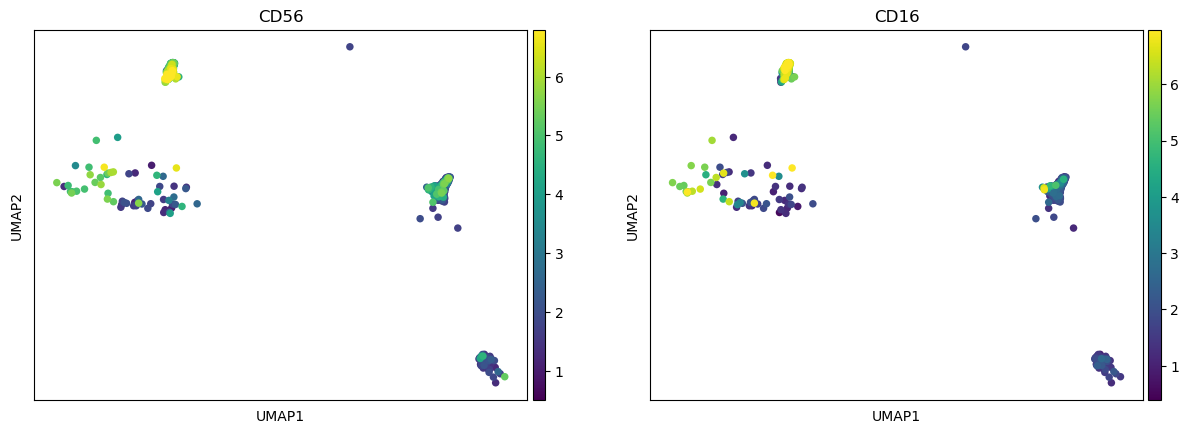

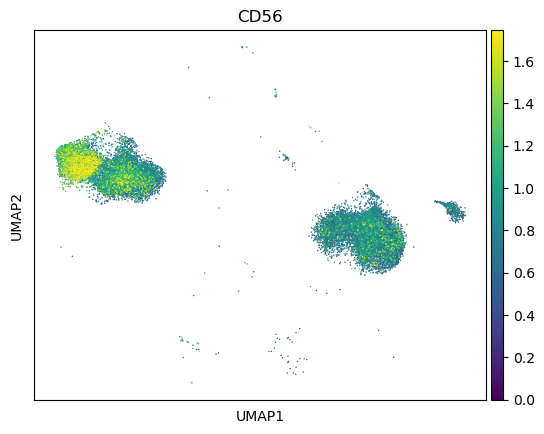

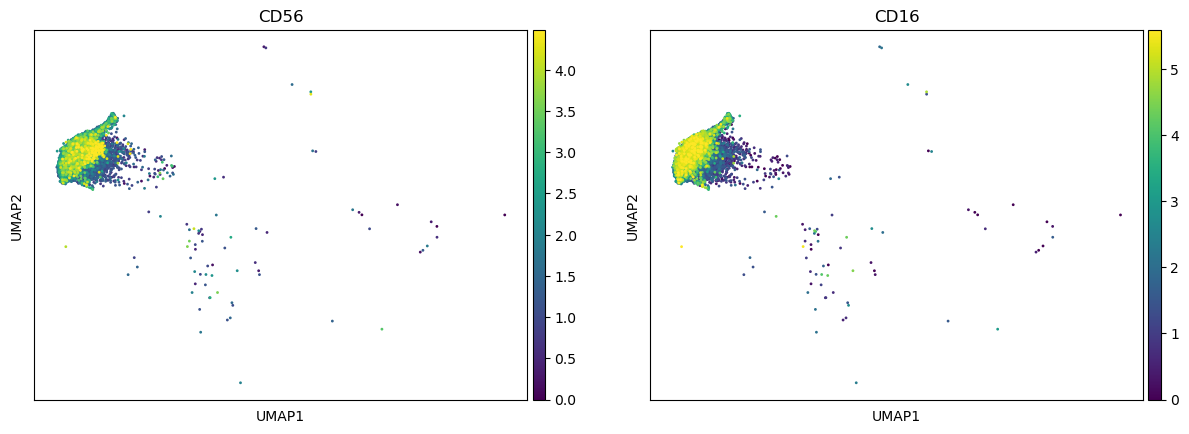

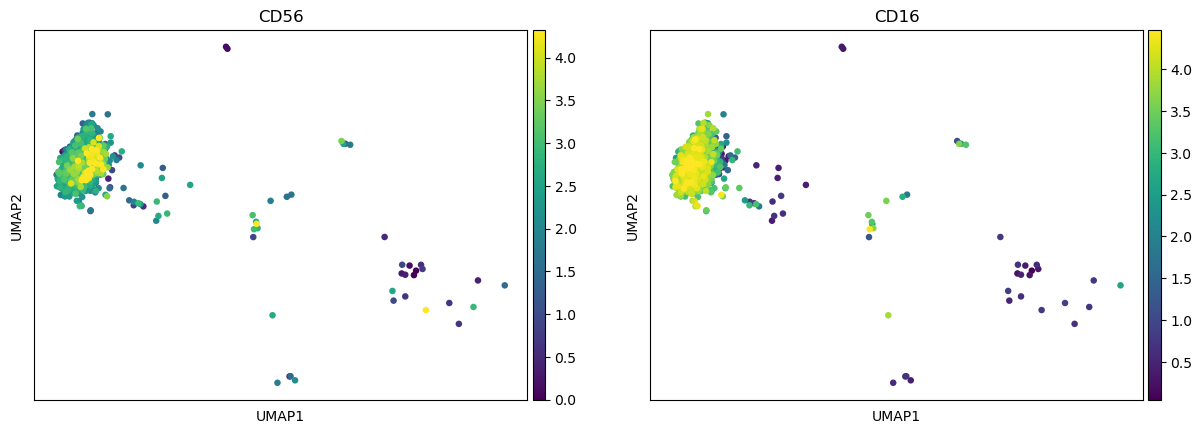

In [40]:
#NK cells

sc.pl.umap(granja_nk, color = markers, vmax="p99", color_map = 'viridis')

sc.pl.umap(easi_nkt, color = "CD56", vmax="p99", color_map = 'viridis')

sc.pl.umap(neurips_nk, color = markers, vmax="p99", color_map = 'viridis')

sc.pl.umap(seurat_nk, color = markers, vmax="p99", color_map = 'viridis')

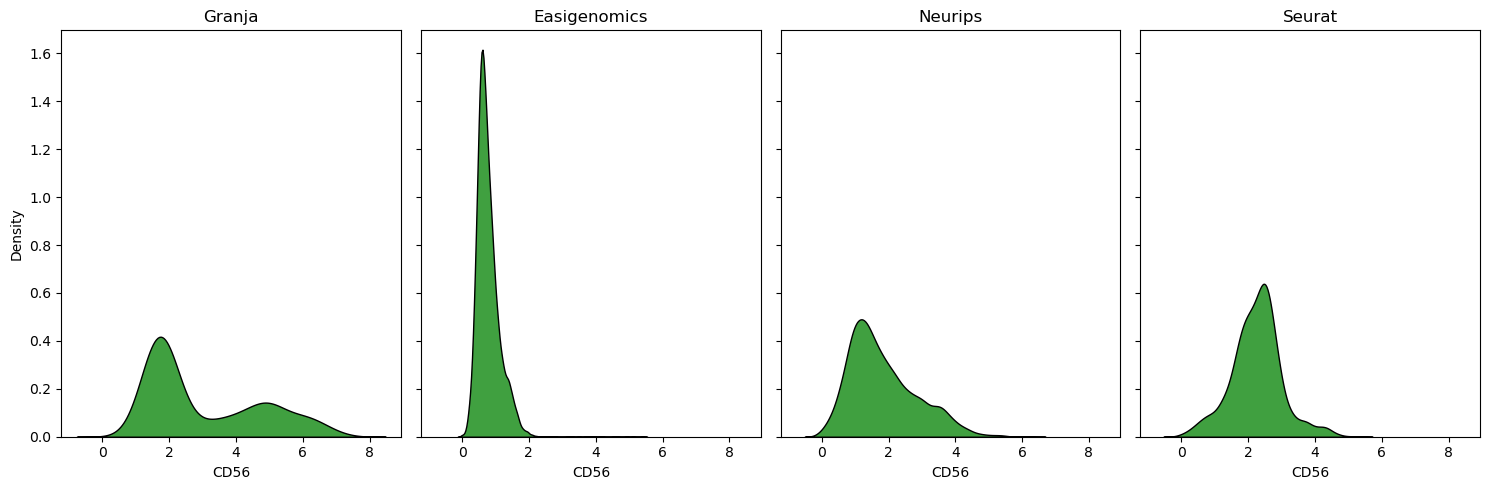

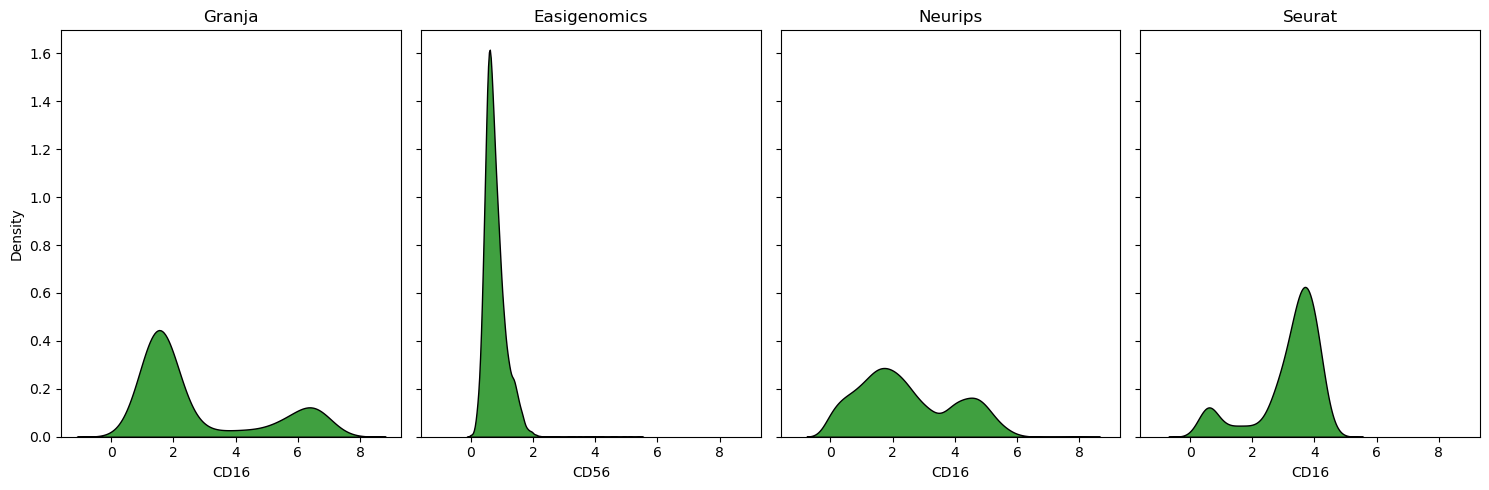

In [41]:
markers = markers

for column_name in markers:
    fig, ax =plt.subplots(1,4 ,tight_layout=True, figsize=(15, 5), sharex=True, sharey=True)
    fig.show()

    ax1 = sns.kdeplot(data=granja_nk_prot, x=column_name, multiple="stack", color= "g", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=easi_nkt_prot, x="CD56", multiple="stack", color="g", ax=ax[1]) ;
    ax3 = sns.kdeplot(data=neurips_nk_prot, x=column_name, multiple="stack", color="g", ax=ax[2]) ;
    ax4 = sns.kdeplot(data=seurat_nk_prot, x=column_name, multiple="stack", color="g", ax=ax[3]) ;

    ax1.title.set_text('Granja')    
    ax2.title.set_text('Easigenomics')
    ax3.title.set_text('Neurips')
    ax4.title.set_text('Seurat')
    
    plt.show()

In [42]:
granja_col=granja_nk_prot.columns

granja_col

Index(['CD3', 'CD8', 'CD56', 'CD19', 'CD45RA', 'CD4', 'CD14', 'CD16', 'CD25',
       'CD45RO', 'CD279', 'TIGIT', 'CD127', 'CD15'],
      dtype='object')

In [43]:
easi_col=easi_nkt_prot.columns

easi_col

Index(['CD19', 'CD10', 'CD20', 'CD3', 'CD2', 'CD11b', 'HLADR', 'CD38', 'CD11c',
       'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA',
       'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15',
       'CD64', 'CD117', 'CD24', 'CD44', 'CD58', 'CD66ace', 'CD13', 'CD34'],
      dtype='object')

In [44]:
neurips_col = neurips_nk_prot.columns

neurips_col

Index(['CD86', 'CD274', 'CD270', 'CD155', 'CD112', 'CD47', 'CD48', 'CD40',
       'CD154', 'CD52',
       ...
       'CD94', 'CD162', 'CD85j', 'CD23', 'CD328', 'HLA-E', 'CD82', 'CD101',
       'CD88', 'CD224'],
      dtype='object', length=134)

In [45]:
seurat_col=seurat_nk_prot.columns

seurat_col

Index(['CD3', 'CD8', 'CD56', 'CD19', 'CD11c', 'CD45RA', 'CD123', 'CD4', 'CD14',
       'CD16', 'CD25', 'CD45RO', 'CD69', 'CD161', 'CD27', 'HLA-DR', 'CD57',
       'CD278', 'CD11a', 'CD79b', 'CD28', 'CD38', 'CD127', 'CD197', 'CD34'],
      dtype='object')

In [46]:
#Finding common markers from all lists

markers_all=set(granja_col).intersection(easi_col, neurips_col, seurat_col)

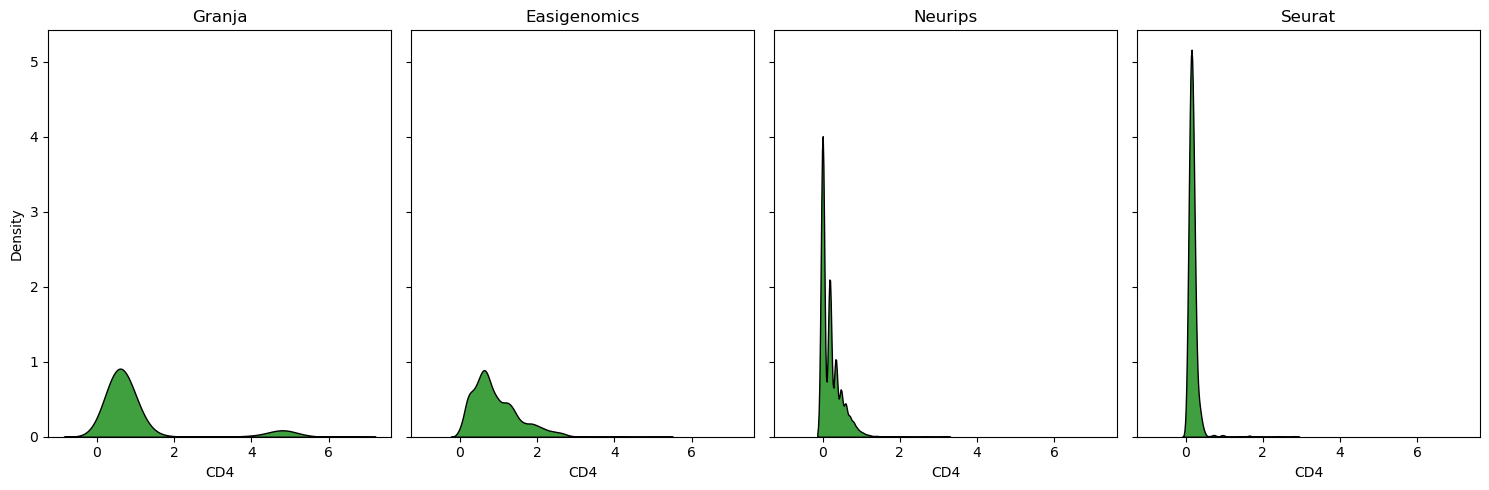

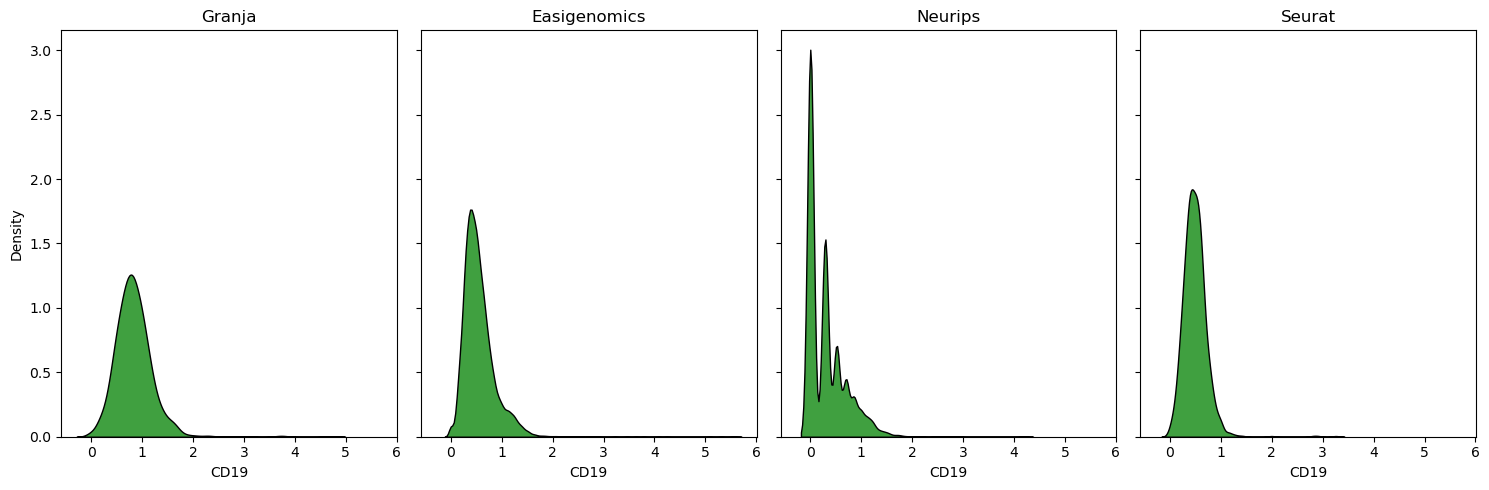

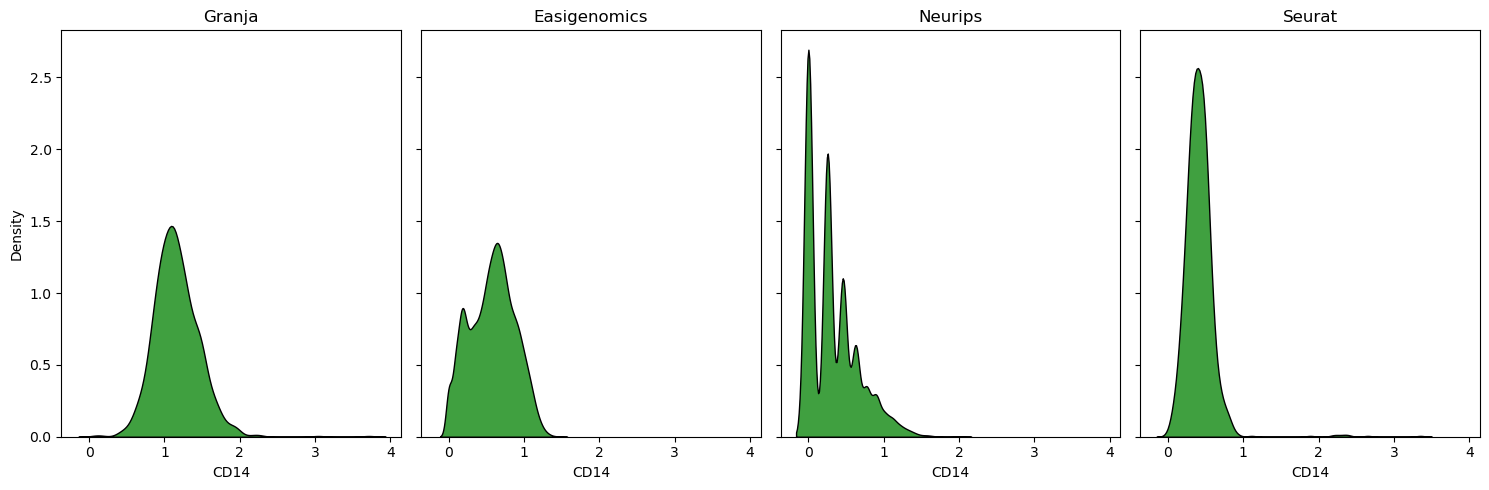

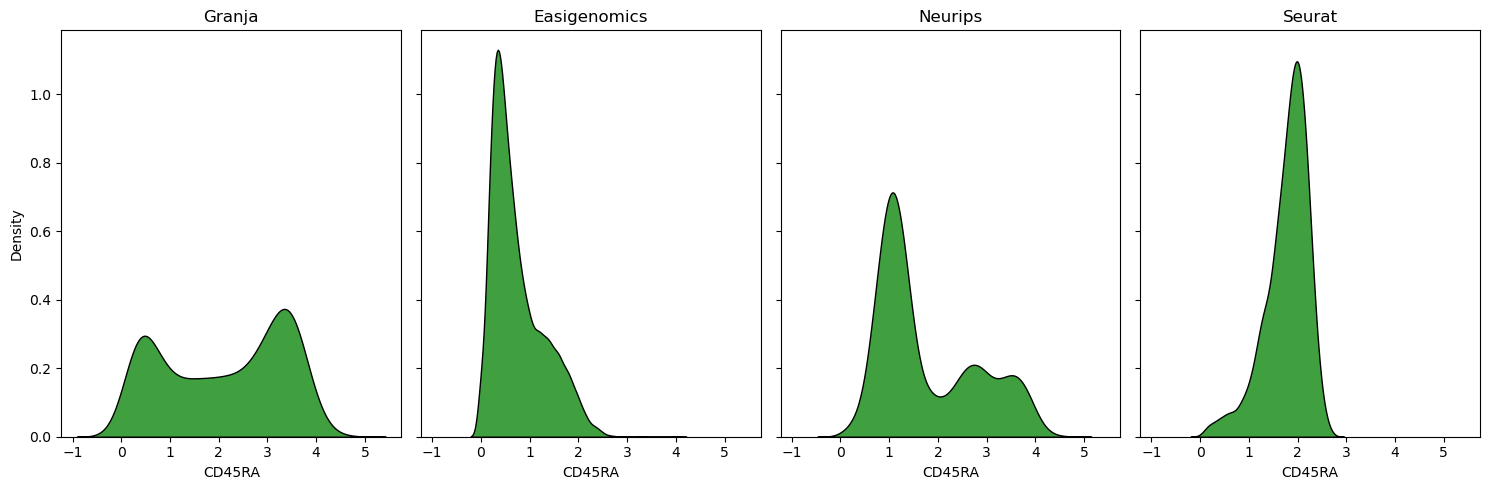

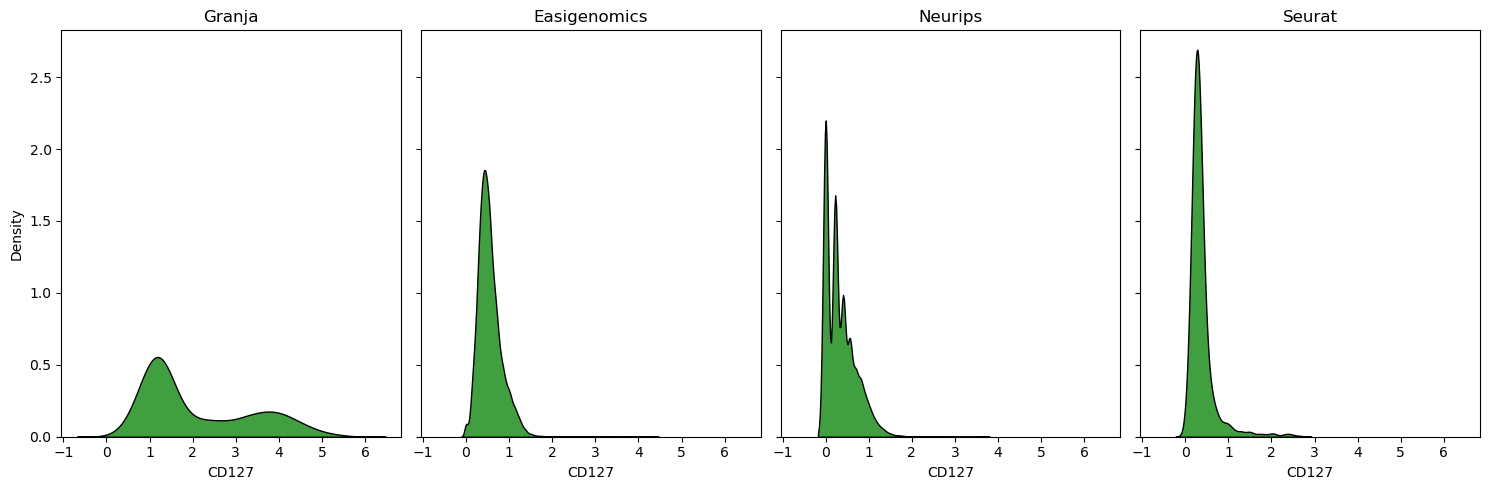

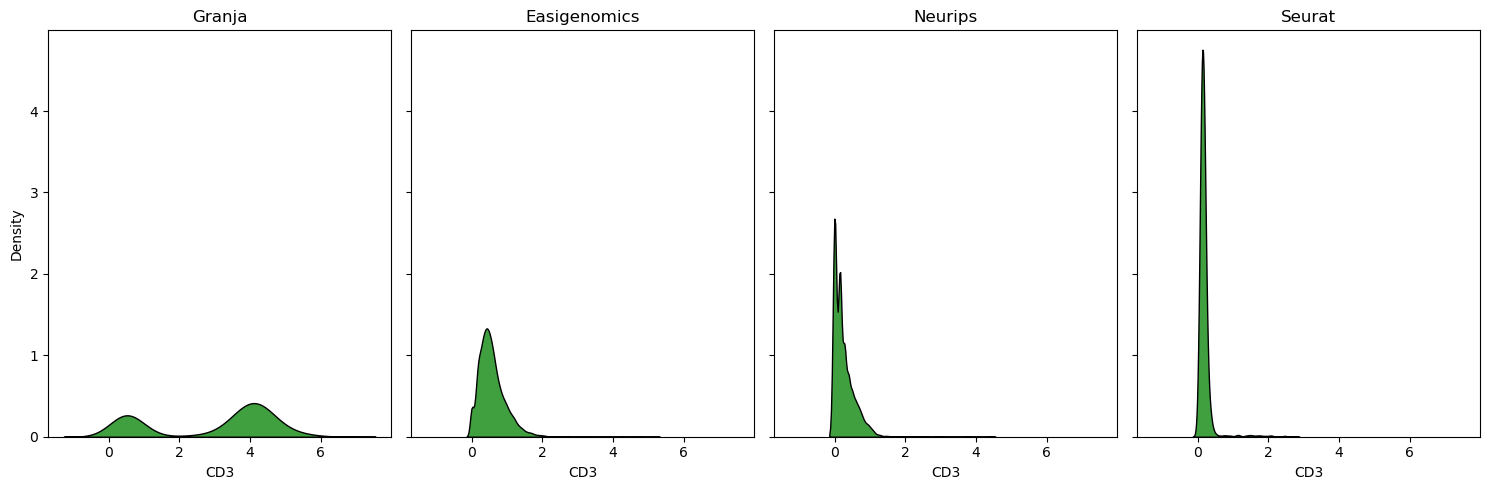

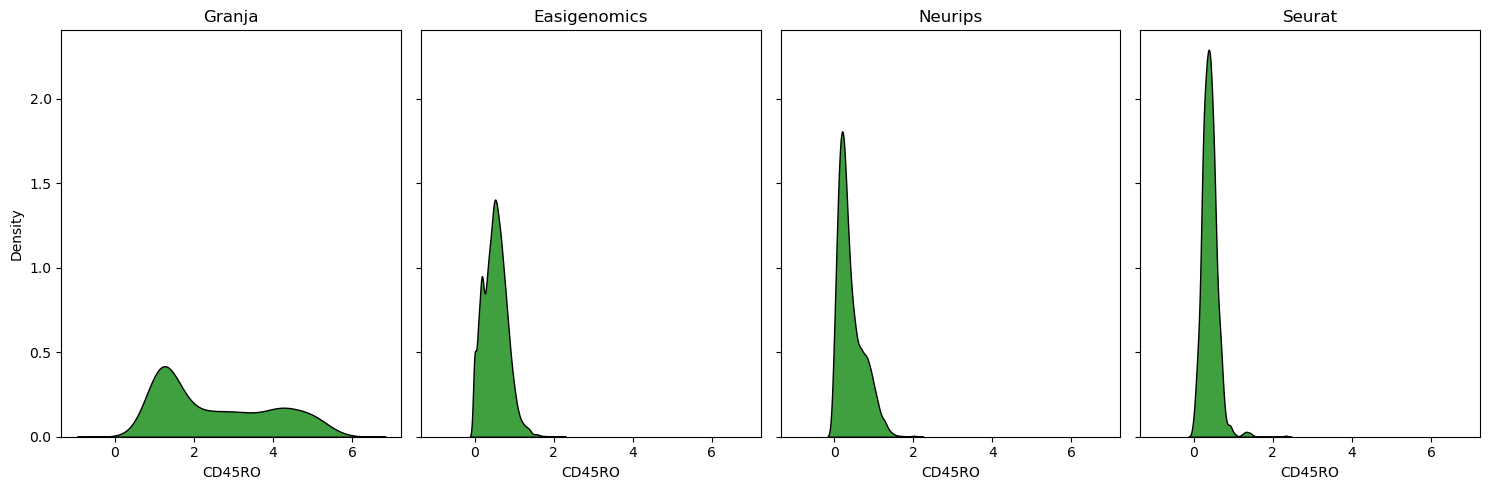

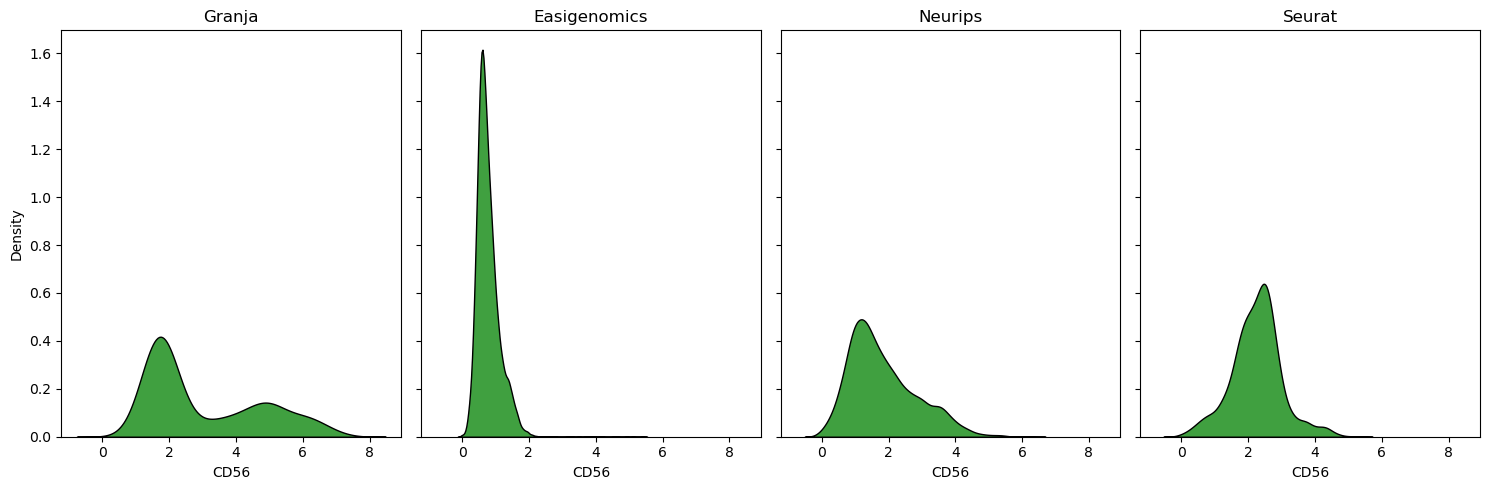

In [47]:
#All markers that are common between datasets
markers = markers_all

for column_name in markers:
    fig, ax =plt.subplots(1,4 ,tight_layout=True, figsize=(15, 5), sharex=True, sharey=True)
    fig.show()

    ax1 = sns.kdeplot(data=granja_nk_prot, x=column_name, multiple="stack", color="g", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=easi_nkt_prot, x=column_name, multiple="stack", color="g", ax=ax[1]) ;
    ax3 = sns.kdeplot(data=neurips_nk_prot, x=column_name, multiple="stack", color="g", ax=ax[2]) ;
    ax4 = sns.kdeplot(data=seurat_nk_prot, x=column_name, multiple="stack", color="g", ax=ax[3]) ;

    ax1.title.set_text('Granja')    
    ax2.title.set_text('Easigenomics')
    ax3.title.set_text('Neurips')
    ax4.title.set_text('Seurat')
    
    plt.show()

In [48]:
x=granja_nk_prot[markers_all]
x["dataset"]="Granja"

y=easi_nkt_prot[markers_all]
y["dataset"]="Easigenomics"

z=neurips_nk_prot[markers_all]
z["dataset"]="Neurips"

å=seurat_nk_prot[markers_all]
å["dataset"]="Seurat"

df_tcells=pd.concat([x,y,z,å])

df_tcells

,CD4,CD19,CD14,CD45RA,CD127,CD3,CD45RO,CD56,dataset
BMMC_D1T1:AAAGAACTCGAAGAAT-1,1.034146,1.663835,1.405688,1.363220,3.336928,4.353571,3.957790,2.060390,Granja
BMMC_D1T1:AAAGGGCAGAAGTGTT-1,0.730584,0.859367,1.028080,0.655778,2.770059,4.046725,4.615375,1.409305,Granja
BMMC_D1T1:AAAGTCCGTCGGAAAC-1,0.430578,1.144146,1.170387,3.886487,1.369466,0.553227,1.032135,5.008568,Granja
BMMC_D1T1:AAAGTGAGTTACCCAA-1,0.568000,0.679362,0.897579,1.765806,4.543125,3.952516,1.969241,1.875397,Granja
BMMC_D1T1:AACAAAGAGTCTGCGC-1,0.858461,0.938517,0.862108,1.016710,1.163131,4.176948,3.033571,1.604798,Granja
...,...,...,...,...,...,...,...,...,...
b_TTTATGCTCAACACAC-1,0.128222,0.793292,0.438846,2.088680,0.299390,0.200146,0.669442,1.864914,Seurat
b_TTTCCTCAGATCCCGC-1,0.157863,0.591728,0.482290,1.125635,0.582857,0.134848,0.429276,1.864914,Seurat
b_TTTCCTCAGTACATGA-1,0.082044,0.417957,0.295890,2.013323,0.704996,0.128963,0.539331,3.999870,Seurat
b_TTTGCGCGTGGTCTCG-1,0.089889,0.844134,0.544112,1.915297,0.413380,0.126008,0.429276,2.393161,Seurat


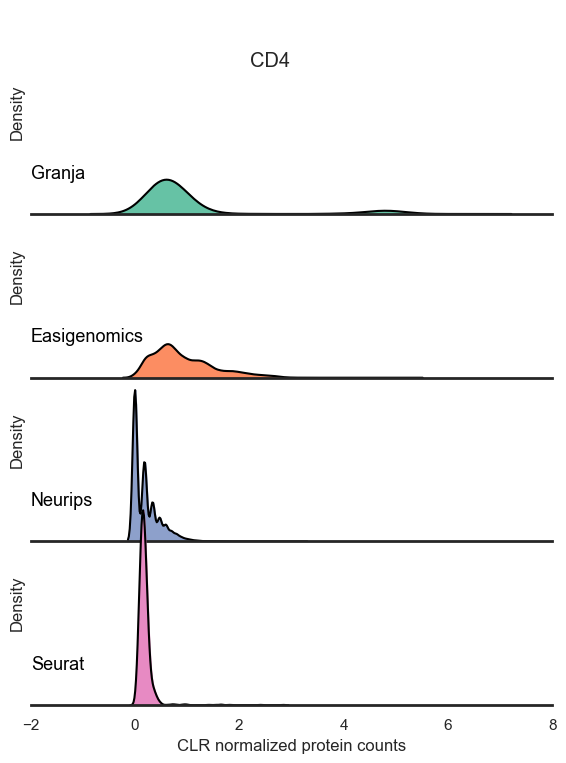

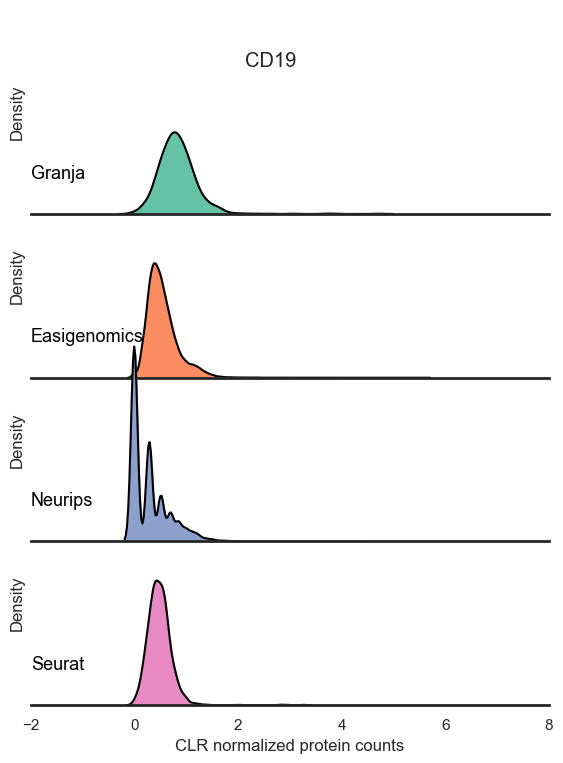

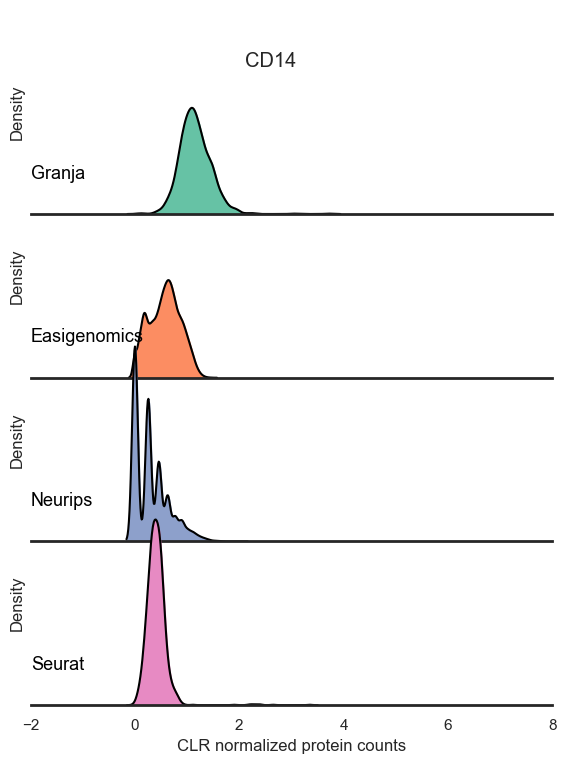

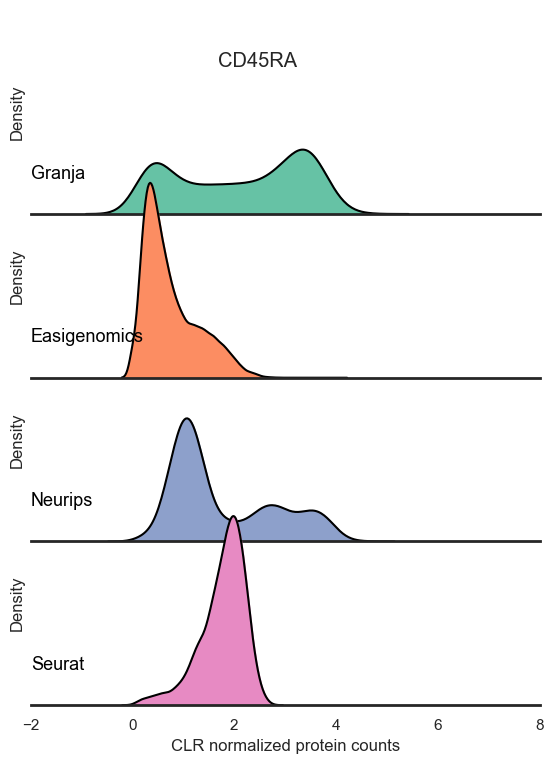

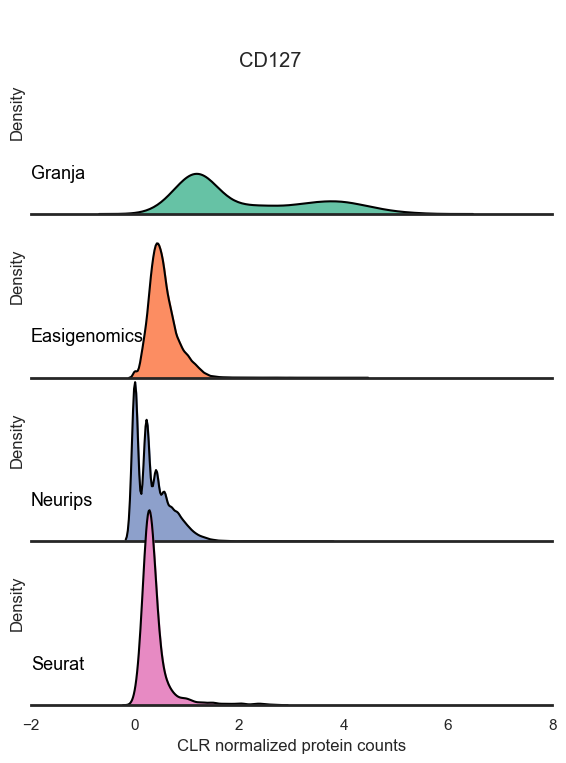

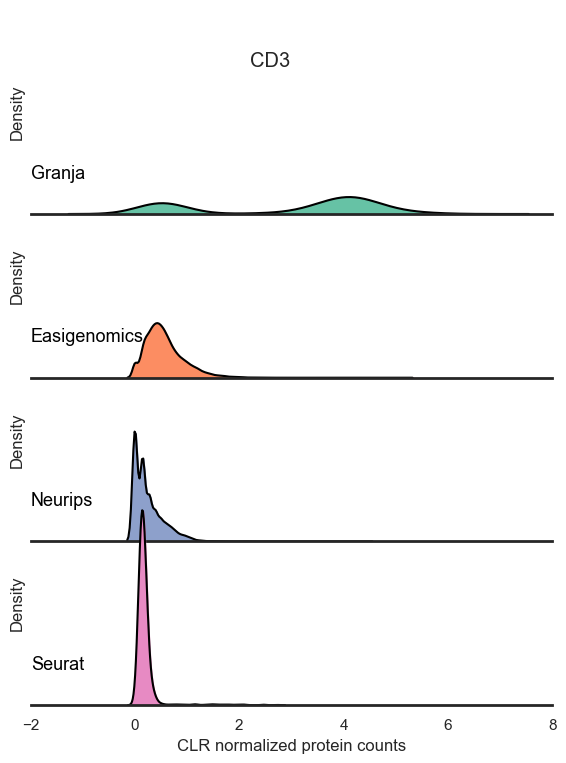

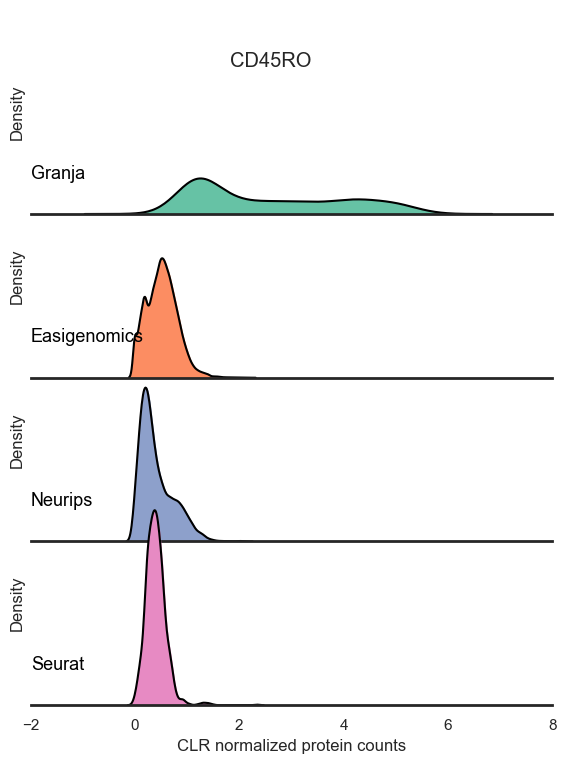

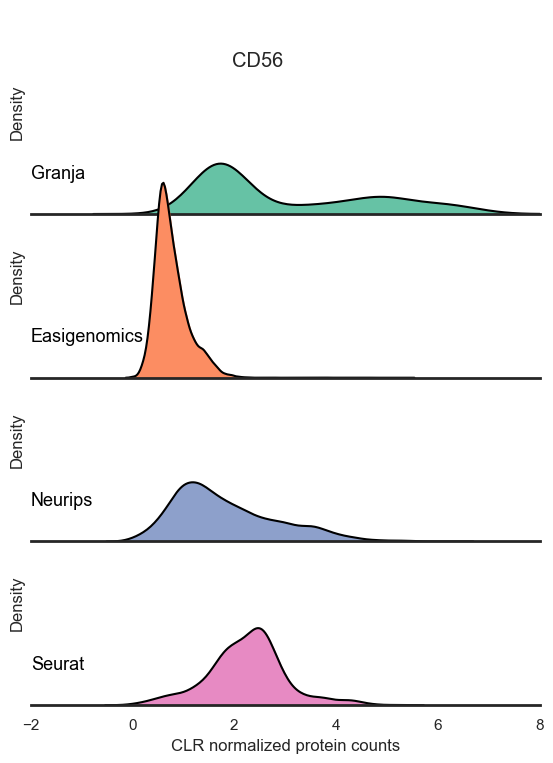

In [54]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)

for marker in markers_all:
    g = sns.FacetGrid(df_tcells, palette=palette, row="dataset", hue="dataset", aspect=3, height=2)

    g.map_dataframe(sns.kdeplot, x=marker, fill=True, alpha=1)
    g.map_dataframe(sns.kdeplot, x=marker, color="black")

    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
    g.map(label, "dataset")
    g.fig.subplots_adjust(hspace=-.2)
    g.set_titles("")
    g.set(yticks=[], xlabel="CLR normalized protein counts")
    g.despine( left=True)

    plt.suptitle(marker, y=0.9)
    
    g.set(xlim=(-2, 8))